# Rojak Language Sentiment Analysis

## Part 1 Understand the Dataset

- In this section, dataset will be load using pandas lib
- Display the first few rows of each dataset to understand the structure.
- Check the data types of each column.

**Overview**
The dataset used is a fusion of two sources: a Reddit dataset from the Malaysia subreddit and a Twitter rojak dataset from [mesolitica](https://huggingface.co/mesolitica) on Hugging Face.


**Reddit Dataset**
Derived from the Malaysia subreddit, this dataset captures diverse discussions within the Malaysian community. The [Malaya](https://malaya.readthedocs.io/en/stable/) library is employed to identify and gather rojak languages.


**Twitter Rojak Dataset**
Sourced from Hugging Face's [language-detection-dataset](https://huggingface.co/datasets/mesolitica/language-detection-dataset/tree/main), this dataset focuses on Twitter rojak records.


**Choice of Two Sources**
Combining Reddit and Twitter datasets offers a comprehensive view of linguistic patterns in both formal discussions and informal social media conversations within the Malaysian context.

In [14]:
import pandas as pd

csv_file_path = 'dataset/text_data.csv'
df = pd.read_csv(csv_file_path)
df

,Type,Text
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover)
1,Comment,ahh i meant my name RAIjin kekw
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello..."
4,Comment,Must use 3 phase electrical wiring ni
...,...,...
4995,Tweet,so gmna kalo aku buat cerita semacam jikook au...
4996,Tweet,penyaluran blt dd nagori dolok kataran kecamat...
4997,Tweet,bts mutualan yuk rep aja aku ada di like ava a...
4998,Tweet,csj hai mutualan yuk elf dn aku ada nya autofo...


In [15]:
df.describe()

,Type,Text
count,5000,5000
unique,3,4925
top,Tweet,selamat adalah salah satu teman terbaik untuk ...
freq,2836,3


### Dataset Summary

The summary statistics for the dataset are presented below:

#### Type Column
- **Count:** 5000
- **Unique:** 3
- **Top:** 'Tweet'
- **Frequency:** 2836

The 'Type' column indicates the category or type of each record in the dataset. There are a total of 5780 records, with three unique types. The most frequently occurring type is 'Tweet', which appears 2836 times.

#### Text Column
- **Count:** 5000
- **Unique:** 4925
- **Top:** "selamat adalah salah satu teman terbaik untuk menghilangkan kebosanan ketika apakah kamu punya favorit photo credit unicef arimacs wilander"
- **Frequency:** 3

The 'Text' column contains the textual content of each record. There are 5780 records in total, with 4925 unique texts. The most frequent text is "selamat adalah salah satu teman terbaik untuk menghilangkan kebosanan ketika apakah kamu punya favorit photo credit unicef arimacs wilander," which appears 3 times.

This summary provides a quick overview of the distribution of types and texts within the dataset.


In [16]:
df[df.duplicated()]

,Type,Text
399,Comment,Is this Anak Kampung in Subang Bestari? Its my...
1238,Comment,Well if you read the Kanun Tanah Negara it is ...
2609,Tweet,ahahahaha beras putih ka merah kelak salah suk...
2780,Tweet,giveaway daripada menuhin lemari nih aku mau g...
2912,Tweet,anf yang suka creamheroes tolong subscribe cha...
...,...,...
4919,Tweet,emang kalo habis mandi pipi lu makin mengemban...
4945,Tweet,ni muka sensitif apa gimana si kalau kerja pak...
4982,Tweet,semoga w dapet orang yg potongan rambutnya dr ...
4988,Tweet,selamat adalah salah satu teman terbaik untuk ...


In [17]:
df = df.drop_duplicates().reset_index(drop=True)
df.describe()

,Type,Text
count,4925,4925
unique,3,4925
top,Tweet,Yiruma - River Flows In You (Teh Banjir Cover)
freq,2763,1


The removal of duplicate values has resulted in a slight reduction in the total number of records to 4925, ensuring a dataset with unique entries in the 'Text' column.

In [51]:
df

,Type,Text
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover)
1,Comment,ahh i meant my name RAIjin kekw
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello..."
4,Comment,Must use 3 phase electrical wiring ni
...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...
4921,Tweet,so gmna kalo aku buat cerita semacam jikook au...
4922,Tweet,penyaluran blt dd nagori dolok kataran kecamat...
4923,Tweet,csj hai mutualan yuk elf dn aku ada nya autofo...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    4925 non-null   object
 1   Text    4925 non-null   object
dtypes: object(2)
memory usage: 77.1+ KB


### DataFrame Information
The DataFrame contains a total of 4925 entries indexed from 0 to 4999. It consists of two columns:

1. **Type:** 4925 non-null entries, data type: object
2. **Text:** 4925 non-null entries, data type: object

Both columns have no missing values. The 'Type' column contains information about the type of each entry, and the 'Text' column holds the textual content. Both columns are of the object data type. The memory usage for this DataFrame is approximately 115.4 KB.


## Part 2 Preprocessing and Language Detection
This phase involves preparing your dataset for analysis and identifying the languages used in the texts. Here's how approach it:

***Converting emoji to text***
- Emojis can become a sentiment indicators and often carry strong emotional content. For example, 🙂 might indicate positive sentiment, while 😞 might indicate negative sentiment.
- In sentiment analysis, especially in informal or social media texts, emojis can be crucial indicators of the writer's feelings.

***Cleaning the Data***
- **Remove URLs and Usernames**: Since these usually don't contribute to sentiment, you can safely remove them.
- **Eliminate Special Characters**: Non-alphanumeric characters (except for common punctuation) might not be useful and can be removed.
- **Normalize Text**: Convert all text to a consistent format, like lowercase, to ensure uniformity.

***Language Identification***
Word or Phrase Level Detection: Since data is a mix of English and Malay, it's important to identify which language each word or phrase is in.

***Tokenisation***
Breaking down a sentence or a text document into individual words or tokens. It involves splitting the given text based on specific delimiters such as spaces or punctuation marks.

**Stemming and Lemmisation**
Steamming and lemmatization are two different methods used in the preprocessing of text data in the field of natural language processing (NLP). Both are used to derive word roots or normalize words, but they offer different approaches and results.

**Reference:**

Çakıcıoğlu, H. (2022, July 10). Comprehensive Text Preprocessing NLP (Natural Language Processing). Medium. [Link](https://medium.com/@hckecommerce/comprehensive-text-preprocessing-nlp-natural-language-processing-fe295978523e#:~:text=Text%20preprocessing%20plays%20a%20crucial,that%20the%20models%20can%20comprehend).

### Text Extraction and Cleanup

***Emoji Conversion***

Before removing the punctuation, convert the emoji into text as it is written in unicode and most time, it indicates some emotional content. However, sometimes user will use multiple same emoji in the text, thus, the repeated emoji also will be considered in this case.

In [18]:
import emoji


#Apply this to avoid repeated representation of same emoji
def reduce_consecutive_emoji_descriptions(tokens):
    reduced_tokens = []
    previous_token = None

    for token in tokens:
        if token != previous_token:
            reduced_tokens.append(token)
            previous_token = token

    return reduced_tokens


# Apply this in the enhanced emoji conversion function
def enhanced_convert_emojis_to_text(text):
    text_with_emojis_converted = emoji.demojize(text, delimiters=(" ", " "))
    tokens = text_with_emojis_converted.split()
    reduced_tokens = reduce_consecutive_emoji_descriptions(tokens)
    return (' '.join(reduced_tokens)).replace("_", " ")


# Apply the emoji conversion to text column
df['text_with_converted_emojis'] = df.loc[:, 'Text'].apply(enhanced_convert_emojis_to_text)

In [19]:
# Display df after emoji converting
df

,Type,Text,text_with_converted_emojis
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover)
1,Comment,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam...","Exactly. Suka duit buat cara suka duit, tamak ..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello...","Where is this? Need to report pulis. ""Ello pul..."
4,Comment,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni
...,...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...
4921,Tweet,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...
4922,Tweet,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...
4923,Tweet,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...


***Reduplicated Word Conversion***

In malay, reduplicated words(aka kata ganda) usually will be written as short form following immediately with a '2'. Thus, this part will handle words ending in '2' by duplicating the preceding word part. For example, "tiba2" becomes "tiba", "jalan2" becomes "jalan", and so on.

In [20]:
import re
def dynamic_reduplicate_word_stems(text):
    # Regular expression pattern to find words ending in '2'
    pattern = r'\b(\w+)2\b'

    # Function to duplicate the word stem
    def reduplicate(match):
        return match.group(1)

    # Replace occurrences in the text
    return re.sub(pattern, reduplicate, text)


# Apply the reduplication function to the 'text_with_converted_emojis' column
df['cleaned_text'] = df['text_with_converted_emojis'].apply(dynamic_reduplicate_word_stems)

In [21]:
# Display df after emoji converting
df

,Type,Text,text_with_converted_emojis,cleaned_text
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover)
1,Comment,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul..."
4,Comment,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni
...,...,...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...
4921,Tweet,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...
4922,Tweet,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...
4923,Tweet,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...


***Expanding Contractions in Pandas DataFrame***

In natural language processing, contractions like "I'll" or "won't" are often used. Before performing data cleaning or analysis, it's beneficial to expand these contractions for better readability and accuracy. Here's how you can do it using the `contractions` library in a Pandas DataFrame:

In [22]:
import contractions


# Function to expand contractions in a text
def expand_contractions(text):
    expanded_words = [contractions.fix(word) for word in text.split()]
    return ' '.join(expanded_words)


# Apply the function to the 'text' column
df['cleaned_text'] = df['cleaned_text'].apply(expand_contractions)

In [23]:
# Display df after contraction converting
df

,Type,Text,text_with_converted_emojis,cleaned_text
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover)
1,Comment,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul..."
4,Comment,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni
...,...,...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...
4921,Tweet,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...
4922,Tweet,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...
4923,Tweet,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...


***Text Cleaning/Noise Removal***

This part cleaning function tailored for social media data.
The process involves several key steps:
- replacing newline characters with spaces
- removing URLs, usernames (Twitter and Reddit)
- eliminates redundant whitespace to ensure uniformity

The goal is to enhance the quality of text data for subsequent analysis, such as sentiment analysis on social media content. By stripping away noise and irrelevant characters, the function produces cleaner, more meaningful text, optimizing it for various natural language processing tasks.

In [25]:
def clean_text(text):
    # Replace newline characters with space
    text = re.sub(r'\n', ' ', text)

    # Remove URLs
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)

    # Remove usernames (or any word starting with @[for Twitter] or u/ and r/[for Reddit])
    text = re.sub(r'@\S+|u/\S+|r/\S+', '', text)

    # Remove duplicate spaces, tabs, and other whitespace char in text
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Apply the modified cleaning function to the text column using .loc
df.loc[:, 'cleaned_text'] = df.loc[:, 'cleaned_text'].apply(clean_text)

In [26]:
# Display the first few rows after cleaning to check for newline character removal
df

,Type,Text,text_with_converted_emojis,cleaned_text
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover)
1,Comment,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul..."
4,Comment,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni
...,...,...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...
4921,Tweet,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...
4922,Tweet,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...
4923,Tweet,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...


***Sentence Segmentation***

Common problem for social media texts, there are missing spaces in the text, so text segmentation can help you, however, segmentation not consider any grammar error. In this case, we will pretrain HuggingFace model from malaya library to perform segmentation, which able to handle code switch text in Malay and English.

In [61]:
import malaya

In [62]:
#Load
malaya_segment_model = malaya.segmentation.huggingface()

**Handling Large Datasets with Memory Constraints using Batch Processing**
When working with large datasets, especially in scenarios where memory resources are limited, processing the entire dataset at once might exceed the available memory, leading to memory errors or crashes. To mitigate these issues, a batch processing approach is employed.

In [ ]:
text_list = [df['cleaned_text'][697]]
batch_size = 100  # Define batch size
segmented_text_list = []

for i in range(0, len(text_list), batch_size):
    batch = text_list[i:i + batch_size]
    segmented_batch = malaya_segment_model.generate(batch)
    segmented_text_list.extend(segmented_batch)
    print(f"Processed {i + len(batch)}/{len(text_list)} rows")


In [ ]:
from concurrent.futures import ThreadPoolExecutor
import malaya
import pandas as pd

batch_size = 100
malaya_segment_model = malaya.segmentation.huggingface()

# Function to segment text using Malaya model
def segment_text_chunk(chunk):
    results = malaya_segment_model.generate(chunk, max_length=256)
    return results

# Split the text list into chunks of not more than 256 chars
max_chunk_length = 256
text_list = df['cleaned_text'].tolist()
text_chunks = []

for text in text_list:
    chunks = [text[i:i + max_chunk_length] for i in range(0, len(text), max_chunk_length)]
    text_chunks.append(chunks)

# Use ThreadPoolExecutor to parallelize processing
with ThreadPoolExecutor() as executor:
    # Map the segment_text_chunk function to the text chunks in parallel
    segmented_text_chunks = list(executor.map(segment_text_chunk, text_chunks))

# Flatten the list of segmented text chunks
segmented_text_list = [''.join(segmented_chunk) for segmented_chunk in segmented_text_chunks]

# Create a Series from the 'segmented_text' column
segmented_series = pd.Series(segmented_text_list)

# Save the Series to a new CSV file
segmented_series.to_csv('dataset/segmented_data_series.csv', index=False, header=['segmented_text'])

In [64]:
#Display the segmented list
segmented_list = pd.read_csv('dataset/segmented_data_series.csv')
segmented_list

,segmented_text
0,Yiruma - River Flows In You (Teh Banjir Cover)
1,ahh i meant my name RAIjin kekw
2,"Exactly. Suka duit buat cara suka duit, tamak ..."
3,"Where is this? Need to report pulis. ""Ello pul..."
4,Must use 3 phase electrical wiring ni
...,...
4920,tls followan yuk kak yang ga masalah aku baru ...
4921,so gmna kalo aku buat cerita semacam jikook au...
4922,penyaluran blt dd nagori dolok kataran kecamat...
4923,csj hai mutualan yuk elf dn aku ada nya autofo...


In [65]:
#Assign the list back to the dataframe
df['segmented_text'] = segmented_list
df

,Type,Text,text_with_converted_emojis,cleaned_text,segmented_text
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover)
1,Comment,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul..."
4,Comment,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni
...,...,...,...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...
4921,Tweet,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...
4922,Tweet,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...,penyaluran blt dd nagori dolok kataran kecamat...
4923,Tweet,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...,csj hai mutualan yuk elf dn aku ada nya autofo...


**Remove Punctuation**
The punctuation are kept before, in order to get a more precise segmentation result, after the segmentation, it should be removed

In [30]:
def remove_punctuation(text):
    return re.sub(r'[^A-Za-z0-9\s]+', '', text)


df['non_punc_text'] = df.loc[:, 'segmented_text'].apply(remove_punctuation)

In [32]:
df.non_punc_text

0             Yiruma  River Flows In You Teh Banjir Cover
1                         ahh i meant my name RAIjin kekw
2       Exactly Suka duit buat cara suka duit tamak ke...
3       Where is this Need to report pulis Ello pulis ...
4                   Must use 3 phase electrical wiring ni
                              ...                        
4920    tls followan yuk kak yang ga masalah aku baru ...
4921    so gmna kalo aku buat cerita semacam jikook au...
4922    penyaluran blt dd nagori dolok kataran kecamat...
4923    csj hai mutualan yuk elf dn aku ada nya autofo...
4924    sampai sma aku masih fans sampo ini emang di e...
Name: non_punc_text, Length: 4925, dtype: object

### Rule Based Approach Normalisation

***Lexical Normalisation***
In this task, Malay Social Networking Service (SNS) abbreviations and short forms are gathered and stored in a JSON file. The objective is to perform lexical normalisation by replacing these abbreviations with their corresponding full-word equivalents. The process involves expanding the abbreviations using a **manually** prepared JSON file that contains both the abbreviations and their full meanings.

**Remove Malay Abbreviation**

In [36]:
import json

# Load the JSON file
file_path = 'dataset/singkatanMalay.json'
with open(file_path, 'r', encoding='utf-8') as file:
    abbreviations = json.load(file)

# Flatten the abbreviation dictionary
flat_abbreviations = {}
for letter_group in abbreviations.values():
    flat_abbreviations.update(letter_group)

In [37]:
# Flatten the abbreviation dictionary
flat_abbreviations = {}
for letter_group in abbreviations.values():
    flat_abbreviations.update(letter_group)


# Create a function to replace abbreviations in a text
def replace_abbreviations_malay(text, abbrev_dict):
    words = text.split()
    normalized_words = [abbrev_dict.get(word.lower(), word) for word in words]
    return ' '.join(normalized_words)


# Apply the replacement function to the 'segmented_text' column
remove_abbreviation = df['non_punc_text'].apply(lambda x: replace_abbreviations_malay(x, flat_abbreviations))

In [38]:
remove_abbreviation

0              Yiruma River Flows In You Teh Banjir Cover
1                         ahh i meant my name RAIjin kekw
2       Exactly Suka duit buat cara suka duit tamak ke...
3       Where is this Need to report police hello poli...
4                  Must use 3 phase electrical wiring ini
                              ...                        
4920    tls followan yuk kakak yang ga masalah aku bar...
4921    so gmna kalau aku buat cerita semacam jikook a...
4922    penyaluran blt dd nagori dolok kataran kecamat...
4923    csj hai mutualan yuk elf dan aku ada nya autof...
4924    sampai sma aku masih fans sampo ini emang di e...
Name: non_punc_text, Length: 4925, dtype: object

**Remove English Abbreviation**

In [39]:
# Load your JSON file into a Python dictionary
with open('english_abbre/abbreviations.json', 'r') as json_file:
    abbreviation_expansion_dict = json.load(json_file)

# Convert the list of dictionaries to a single dictionary with lowercase keys
abbreviation_expansion_dict = {item['Abbreviation'].lower(): item['Expansion'] for item in abbreviation_expansion_dict}


# Function to replace abbreviations with their expansions in a given text
def replace_abbreviations(text, abbrev_dict):
    words = text.split()
    updated_words = [abbrev_dict.get(word.lower(), word) for word in words]
    return ' '.join(updated_words)


# Apply the function to the text column of your DataFrame
remove_abbreviation = remove_abbreviation.apply(lambda x: replace_abbreviations(x, abbreviation_expansion_dict))

In [40]:
remove_abbreviation

0              Yiruma River Flows In You Teh Banjir Cover
1                         ahh i meant my name RAIjin kekw
2       Exactly Suka duit buat cara suka duit tamak ke...
3       Where is this Need time out report police hell...
4                  Must use 3 phase electrical wiring ini
                              ...                        
4920    tls followan yuk kakak yang go ahead masalah a...
4921    so gmna kalau aku buat cerita semacam jikook a...
4922    penyaluran blt dd nagori dolok kataran kecamat...
4923    csj hai mutualan yuk elf dan aku ada nya autof...
4924    sampai sma aku masih fans sampo ini emang di e...
Name: non_punc_text, Length: 4925, dtype: object

***Normalization Using Rule-Based Approach***

The normalization process is conducted through a rule-based approach in Jupyter. The set of normalization rules has undergone modifications for improved effectiveness.

***Rule Types:***

| Rule Type                                              | Original               | Modified   |
|--------------------------------------------------------|------------------------|------------|
| **Elimination of Words with 2 or More Hyphens**        | PQR2 pokok2, PQR ayam2 | PQR pokok, PQR ayam |
|                                                        | PQR-PQR itik-itik      | PQR itik   |
|                                                        | PQR PQR api api        | PQR api    |
| **Elimination of Duplicate Characters**                | PQRRRRR takkkkk        | PQR tak    |
| **Splitting Words with Similar Terms into Two Groups** | PQPQPQPQ hahahaha      | PQPQ haha  |
| **Remove duplicate word**                              | PQ PQ PQ ha ha ha      | PQ ha      |


This rule-based normalization process ensures that the modified versions align with the desired standards, enhancing the clarity and consistency of the text.


In [42]:
import re


def eliminate_duplicate_characters(text):
    # Eliminate consecutive duplicate characters (case-insensitive)
    return re.sub(r'(\w)(?i:\1{2,})', r'\1', text)


def split_repeated_terms(text):
    # Split words that are repeated two-character sequences
    return re.sub(r'(\b\w{2}\b)(\s*)', r'\1\2 ', text)


def deduplicate_hyphenated_words(text):
    pattern = r'\b(\w+)-\1\b'
    text = re.sub(pattern, r'\1', text)

    pattern = r'\b(\w+)(?:\s+\1)+\b'
    text = re.sub(pattern, r'\1', text)

    return text


def remove_duplicate_words(text):
    # Use a regex pattern to match repeated words
    pattern = re.compile(r'\b(\w+)(?:\s+\1\b)+', re.IGNORECASE)

    # Replace repeated words with a single occurrence
    cleaned_text = pattern.sub(r'\1', text)

    return cleaned_text


def normalize_text(text):
    text = deduplicate_hyphenated_words(text)
    text = eliminate_duplicate_characters(text)
    text = split_repeated_terms(text)
    text = remove_duplicate_words(text)
    return text


remove_abbreviation1 = remove_abbreviation.apply(normalize_text)

In [43]:
remove_abbreviation1

0             Yiruma River Flows In  You Teh Banjir Cover
1                        ahh i meant my  name RAIjin kekw
2       Exactly Suka duit buat cara suka duit tamak ke...
3       Where is  this Need time out report police hel...
4                  Must use 3 phase electrical wiring ini
                              ...                        
4920    tls followan yuk kakak yang go  ahead masalah ...
4921    so  gmna kalau aku buat cerita semacam jikook ...
4922    penyaluran blt dd  nagori dolok kataran kecama...
4923    csj hai mutualan yuk elf dan aku ada nya autof...
4924    sampai sma aku masih fans sampo ini emang di  ...
Name: non_punc_text, Length: 4925, dtype: object

In [44]:
df['remove_abb'] = remove_abbreviation1

***Removing Numbers in Text Preprocessing***

In this section, the focus shifts away from considering numbers as a primary concern in text preprocessing. The goal is to remove numeric characters from the text, as they may not be crucial for subsequent processing steps.

This step is performed to streamline the text data and eliminate numerical elements that might not contribute significantly to the desired outcomes in later sections.

In [45]:
def remove_numbers_from_text(text):
    return ' '.join(re.sub(r'\d+', '', text).split())


df['text_xnum'] = df.loc[:, 'remove_abb'].apply(remove_numbers_from_text)

In [46]:
df.text_xnum

0              Yiruma River Flows In You Teh Banjir Cover
1                         ahh i meant my name RAIjin kekw
2       Exactly Suka duit buat cara suka duit tamak ke...
3       Where is this Need time out report police hell...
4                    Must use phase electrical wiring ini
                              ...                        
4920    tls followan yuk kakak yang go ahead masalah a...
4921    so gmna kalau aku buat cerita semacam jikook a...
4922    penyaluran blt dd nagori dolok kataran kecamat...
4923    csj hai mutualan yuk elf dan aku ada nya autof...
4924    sampai sma aku masih fans sampo ini emang di e...
Name: text_xnum, Length: 4925, dtype: object

### Text Formatting

Text formatting refers to the process of manipulating the structure or appearance of a text to achieve a desired format or style. It involves applying specific transformations or modifications to the text to meet certain requirements or conventions.

***Lowercasing***

Lowercasing is a text formatting technique that involves converting all characters in a text to lowercase.Because even if it is the same word, the presence of uppercase or lowercase letters can confuse the model and lead it to perceive them as different words.

In [47]:
def text_lowercase_remove_xtra_space(text):
    cleaned_text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    cleaned_text = cleaned_text.lower()

    return cleaned_text


df['formatted_text'] = df.loc[:, 'text_xnum'].apply(text_lowercase_remove_xtra_space)
df.formatted_text

0              yiruma river flows in you teh banjir cover
1                         ahh i meant my name raijin kekw
2       exactly suka duit buat cara suka duit tamak ke...
3       where is this need time out report police hell...
4                    must use phase electrical wiring ini
                              ...                        
4920    tls followan yuk kakak yang go ahead masalah a...
4921    so gmna kalau aku buat cerita semacam jikook a...
4922    penyaluran blt dd nagori dolok kataran kecamat...
4923    csj hai mutualan yuk elf dan aku ada nya autof...
4924    sampai sma aku masih fans sampo ini emang di e...
Name: formatted_text, Length: 4925, dtype: object

***Stop words Removal***

StopWords Removal is a process of eliminating common words, known as stopwords, from a text. These stopwords are usually words that do not carry significant meaning or contribute to the overall context of the text. By removing stopwords, we can focus on the more meaningful and informative words in the text for analysis or processing tasks.

**Malay Stopwords Removal**

The stopword is from the malaya library, which record comprehensive stop word in bahasa.

In [48]:
def remove_malay_stopwords(text):
    # Get a set of Malay stopwords
    stopwords = set(malaya.text.function.get_stopwords())

    # Tokenize the text (simple split by spaces, can be replaced by a more sophisticated tokenizer)
    words = text.split()

    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords]

    # Reconstruct the text
    return ' '.join(filtered_words)


df['remove_stopword'] = df.loc[:, 'formatted_text'].apply(remove_malay_stopwords)
df.remove_stopword

NameError: name 'malaya' is not defined

**English Stopwords Removal**

In this part, we use the Natural Language Toolkit (NLTK) library in Python to remove English stopwords from a given text. Stopwords are commonly used words (e.g., "the," "and," "is") that are often removed in text processing tasks to focus on more meaningful words.

In [193]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')


def remove_english_stopwords(text):
    # Set of English stopwords
    stop_words = set(stopwords.words('english'))

    # Tokenize the text
    word_tokens = word_tokenize(text)

    # Remove stopwords
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    # Reconstruct the text
    return ' '.join(filtered_text)


df['remove_stopword'] = df.loc[:, 'remove_stopword'].apply(remove_english_stopwords)
df.remove_stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wr431\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wr431\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                     yiruma river flows teh banjir cover
1                              ahh meant name raijin kekw
2              exactly suka duit suka duit tamak act like
3       need time report police hello police report pa...
4                        must use phase electrical wiring
                              ...                        
4920    tls followan yuk go ahead netas retweet real t...
4921                 gmna cerita jikook au something like
4922    penyaluran blt dd nagori dolok kataran kecamat...
4923    csj mutualan yuk elf autofollback eunhae shipp...
4924    sma fans sampo emang eslen sist rexy membeli m...
Name: remove_stopword, Length: 4925, dtype: object

### Tokenisation

***Tokenization*** is a fundamental natural language processing (NLP) task involving the segmentation of a text into individual units, typically words or subwords. It serves as a crucial preprocessing step before various NLP tasks. In tokenization, the input text is divided into tokens, enabling easier analysis and manipulation of linguistic units.


***Tokenize the Text***
Start by tokenizing the text into individual words or phrases.

In [194]:
from nltk.tokenize import word_tokenize

# Tokenize the text using .loc
df.loc[:, 'tokenized_text'] = df['remove_stopword'].apply(word_tokenize)

In [195]:
df.tokenized_text

0              [yiruma, river, flows, teh, banjir, cover]
1                        [ahh, meant, name, raijin, kekw]
2       [exactly, suka, duit, suka, duit, tamak, act, ...
3       [need, time, report, police, hello, police, re...
4                  [must, use, phase, electrical, wiring]
                              ...                        
4920    [tls, followan, yuk, go, ahead, netas, retweet...
4921          [gmna, cerita, jikook, au, something, like]
4922    [penyaluran, blt, dd, nagori, dolok, kataran, ...
4923    [csj, mutualan, yuk, elf, autofollback, eunhae...
4924    [sma, fans, sampo, emang, eslen, sist, rexy, m...
Name: tokenized_text, Length: 4925, dtype: object

***Word-Level Language Detection***

Word-level language detection involves identifying the language of individual words or phrases within a text. This approach allows for tailored processing based on the language of each unit, enabling more accurate linguistic tasks in multilingual contexts.

In this section,
- Apply language detection at the word or phrase level within each record.
- This approach involves checking the language of each word or phrase and then processing it accordingly.

In [196]:
#Load model
fasttext = malaya.language_detection.fasttext()
model = malaya.language_detection.substring_rules(model=fasttext)

In [197]:
def apply_language_detection(row):
    # Apply the model to each word in the list
    return list(zip(row, model.predict(row)))


# Apply the function to the 'tokenized_text' column
token_lang_refer = df['tokenized_text'].apply(apply_language_detection)

In [198]:
token_lang_refer

0       [(yiruma, OTHERS), (river, EN), (flows, EN), (...
1       [(ahh, OTHERS), (meant, EN), (name, EN), (raij...
2       [(exactly, EN), (suka, MS), (duit, MS), (suka,...
3       [(need, EN), (time, EN), (report, EN), (police...
4       [(must, EN), (use, EN), (phase, EN), (electric...
                              ...                        
4920    [(tls, OTHERS), (followan, MS), (yuk, EN), (go...
4921    [(gmna, MS), (cerita, MS), (jikook, OTHERS), (...
4922    [(penyaluran, MS), (blt, OTHERS), (dd, EN), (n...
4923    [(csj, OTHERS), (mutualan, MS), (yuk, EN), (el...
4924    [(sma, EN), (fans, EN), (sampo, OTHERS), (eman...
Name: tokenized_text, Length: 4925, dtype: object

In the language detection, it basically can be categorised into 4 labels:

**EN**: Label for the English content
**MS**: Label for the Malay content
**NOT_LANG**: This label might be used for non-linguistic elements such as numbers, symbols, emojis, or special characters.
**OTHERS**: This could include unknown words, domain-specific jargon, names, or other tokens that don't fall into known language categories.

### Word Processing

Steaming and lemmatisation are two different methods used in the preprocessing of text data in the field of natural language processing (NLP) that lowers inflexion in words to their root forms. Both are used to derive word roots or normalise words, but they offer different approaches and results. Usually, Lemmatization is preferred over Stemming because it is a contextual analysis of words instead of using a hard-coded rule to chop off suffixes. However, if the text documents are very long, then Lemmatization takes considerably more time, which is a severe disadvantage.

***Stemming and lemmatisation***

In this part, spcay and malaya library will be used to perform the stemming based on the language of the token. To handle the not lang and others label tokens, we decide to keep these tokens as they are, sicne they might carry important information or context for the sentiment analysis.

In [199]:
# Load the Naive and Sastrawi stemmers
malay_naive_stemmer = malaya.stem.naive()
malay_sastrawi_stemmer = malaya.stem.sastrawi()


def apply_stemming_methods(text):
    naive_stemmed = malay_naive_stemmer.stem(text)
    sastrawi_stemmed = malay_sastrawi_stemmer.stem(text)

    return {
        'naive_stemmed': naive_stemmed,
        'sastrawi_stemmed': sastrawi_stemmed,
    }


# Assuming your dataframe has a column named 'Text' containing the text to be stemmed
stemmed_results = df.head(30)['formatted_text'].apply(apply_stemming_methods)
# Print the stemmed results for the first 10 rows
for index, result in stemmed_results.items():
    print(f"Original Text: {df.loc[index, 'formatted_text']}")
    print(f"Naive Stemmed: {result['naive_stemmed']}")
    print(f"Sastrawi Stemmed: {result['sastrawi_stemmed']}")
    print("-----------------------------------------------------")

Original Text: yiruma river flows in you teh banjir cover
Naive Stemmed: yiruma river flows in you teh banjir cover
Sastrawi Stemmed: yiruma river flows in you teh banjir cover
-----------------------------------------------------
Original Text: ahh i meant my name raijin kekw
Naive Stemmed: ahh i meant my name raijin kw
Sastrawi Stemmed: ahh i meant my name raijin kekw
-----------------------------------------------------
Original Text: exactly suka duit buat cara suka duit tamak ke apa but do not act like you do not
Naive Stemmed: exactly suka duit buat cara suka duit tamak ke apa but do not act like you do not
Sastrawi Stemmed: exactly suka duit buat cara suka duit tamak ke apa but do not act like you do not
-----------------------------------------------------
Original Text: where is this need time out report police hello police apa dia ini i hendak report pasal banyak air con kat rumah besar hujung taman saya banyak aircon ya banyak berapa you nampak berpuluh puluh biar betulmesti

When manually comparing the performance of the naive stemmer and the Sastrawi stemmer provided by the Malaya library, it becomes evident that the Sastrawi stemmer outperforms the naive stemmer. The Sastrawi stemmer demonstrates superior performance by avoiding overstemming, resulting in more accurate and reliable stemming outcomes. Thus, the Sastrawi stemmer will be applied.


In this code, stemming is applied to a series of tokenized text, where each token is represented as a tuple with a list of tokens and their associated language. The process involves lemmatizing English tokens using spaCy and stemming Malay tokens using Malaya's Sastrawi stemmer. The process_token function determines the language of each token based on the tuple and applies the appropriate stemming or lemmatization method. English tokens are lemmatized to their base form, while Malay tokens are stemmed to their root form. Tokens in 'OTHERS' or 'NOT_LANG' languages remain unchanged. The output is a new series with processed tokens, reflecting language-specific stemming or lemmatization.

In [200]:
import spacy
import malaya

# Load English NLP tools
spacy_lemma = spacy.load('en_core_web_sm')  # For lemmatization
# Load Malay stemmer
malay_sastrawi_stemmer = malaya.stem.sastrawi()


# Function to process each token based on its language
def process_token(tokens):
    lang = tokens[0][1]  # Assuming language is the same for all tokens in a row
    processed_tokens = [process_token_inner(token, lang) for token, lang in tokens]
    return processed_tokens


def process_token_inner(token, lang):
    if lang == 'EN':
        # Process English tokens for lemmatization
        doc = spacy_lemma(token)
        return doc[0].lemma_
    elif lang == 'MS':
        # Process Malay tokens for stemming
        return malay_sastrawi_stemmer.stem(token)
    else:
        # For OTHERS and NOT_LANG, keep the token as is
        return token


# Apply the function to each row
stemmed_token = token_lang_refer.apply(process_token)

In [202]:
stemmed_token

0               [yiruma, river, flow, teh, banjir, cover]
1                         [ahh, mean, name, raijin, kekw]
2       [exactly, suka, duit, suka, duit, tamak, act, ...
3       [need, time, report, police, hello, police, re...
4                    [must, use, phase, electrical, wire]
                              ...                        
4920    [tls, followan, yuk, go, ahead, netas, retweet...
4921          [gmna, cerita, jikook, au, something, like]
4922    [salur, blt, dd, nagori, dolok, kataran, camat...
4923    [csj, mutualan, yuk, elf, autofollback, eunhae...
4924    [sma, fan, sampo, emang, eslen, sist, rexy, be...
Name: tokenized_text, Length: 4925, dtype: object

In [206]:
df['lang_label'] = token_lang_refer
df['stemmed_token'] = stemmed_token
df

,Type,Text,text_with_converted_emojis,cleaned_text,segmented_text,non_punc_text,remove_abb,text_xnum,formatted_text,remove_stopword,tokenized_text,lang_label,stemmed_token
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma River Flows In You Teh Banjir Cover,Yiruma River Flows In You Teh Banjir Cover,Yiruma River Flows In You Teh Banjir Cover,yiruma river flows in you teh banjir cover,yiruma river flows teh banjir cover,"[yiruma, river, flows, teh, banjir, cover]","[(yiruma, OTHERS), (river, EN), (flows, EN), (...","[yiruma, river, flow, teh, banjir, cover]"
1,Comment,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name raijin kekw,ahh meant name raijin kekw,"[ahh, meant, name, raijin, kekw]","[(ahh, OTHERS), (meant, EN), (name, EN), (raij...","[ahh, mean, name, raijin, kekw]"
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ...",Exactly Suka duit buat cara suka duit tamak ke...,Exactly Suka duit buat cara suka duit tamak ke...,Exactly Suka duit buat cara suka duit tamak ke...,exactly suka duit buat cara suka duit tamak ke...,exactly suka duit suka duit tamak act like,"[exactly, suka, duit, suka, duit, tamak, act, ...","[(exactly, EN), (suka, MS), (duit, MS), (suka,...","[exactly, suka, duit, suka, duit, tamak, act, ..."
3,Comment,"Where is this? Need to report pulis. \n\n""Ello...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul...",Where is this Need to report pulis Ello pulis ...,Where is this Need time out report police hel...,Where is this Need time out report police hell...,where is this need time out report police hell...,need time report police hello police report pa...,"[need, time, report, police, hello, police, re...","[(need, EN), (time, EN), (report, EN), (police...","[need, time, report, police, hello, police, re..."
4,Comment,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ini,Must use phase electrical wiring ini,must use phase electrical wiring ini,must use phase electrical wiring,"[must, use, phase, electrical, wiring]","[(must, EN), (use, EN), (phase, EN), (electric...","[must, use, phase, electrical, wire]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kakak yang go ahead masalah ...,tls followan yuk kakak yang go ahead masalah a...,tls followan yuk kakak yang go ahead masalah a...,tls followan yuk go ahead netas retweet real t...,"[tls, followan, yuk, go, ahead, netas, retweet...","[(tls, OTHERS), (followan, MS), (yuk, EN), (go...","[tls, followan, yuk, go, ahead, netas, retweet..."
4921,Tweet,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalo aku buat cerita semacam jikook au...,so gmna kalau aku buat cerita semacam jikook ...,so gmna kalau aku buat cerita semacam jikook a...,so gmna kalau aku buat cerita semacam jikook a...,gmna cerita jikook au something like,"[gmna, cerita, jikook, au

### Special NLP Processes

Processes employ specialized algorithms and models to extract insights from text data, enabling targeted analysis and understanding of language patterns beyond basic NLP tasks.

***NER (named entity recognition)***

NER (named entity recognition) is a natural language processing (NLP) technique used to recognize named entities (e.g., persons, locations, organizations) in text. It involves identifying specific words or phrases in the text and assigning relevant labels to them based on their entity type.

In [171]:
malaya.zero_shot.entity.available_huggingface()

`exactly-match` and `f1` scores based on generated test set, it does not represent accuracy on actual human texts.


,Size (MB),exactly-match,f1
mesolitica/finetune-zeroshot-ner-t5-tiny-standard-bahasa-cased,139.0,0.920265,0.950808
mesolitica/finetune-zeroshot-ner-t5-small-standard-bahasa-cased,242.0,0.920894,0.951281
mesolitica/finetune-zeroshot-ner-t5-base-standard-bahasa-cased,892.0,0.891753,0.934448


In [172]:
ner_model = malaya.zero_shot.entity.huggingface()

tokenizer_config.json:   0%|          | 0.00/2.55k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/803k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/830 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [220]:
tags = ['nama', 'orang', 'lokasi', 'makanan', 'nama parti politik', 'politician', 'lagu', 'negara']


# Define a function to apply NER and format the results
def apply_and_format_ner(row, tags):
    text = row['text_xnum']

    # Apply NER model
    ner_results = ner_model.predict(text, tags,
                                    max_length=50,
                                    top_k=50,
                                    top_p=0.95)

    # Transform the result into the desired format
    formatted_results = []
    for tag, entities in ner_results.items():
        for entity in entities:
            formatted_results.append((entity, tag))

    return formatted_results


# Example usage with DataFrame
# df = pd.DataFrame(...)  # Your DataFrame
df['ner_results'] = df.apply(lambda row: apply_and_format_ner(row, tags), axis=1)

In [221]:
df.ner_results

0       [(Yiruma River Flows In You Teh Banjir Cover, ...
1             [(RAIjin kekw, nama), (RAIjin kekw, orang)]
2                                                      []
3                                                      []
4                                                      []
                              ...                        
4920        [(yaa wonyoung, nama), (yaa wonyoung, orang)]
4921                                 [(jikook au, orang)]
4922    [(blt dd nagori dolok kataran kecamatan dolok ...
4923    [(autofollback, orang), (csj hai mutualan yuk ...
4924    [(emang, nama), (sma, orang), (emang, orang), ...
Name: ner_results, Length: 4925, dtype: object

In [228]:
tags = ['nama', 'orang', 'lokasi', 'makanan', 'nama parti politik', 'politician', 'lagu', 'negara']


# Define a function to apply NER and format the results
def apply_and_format_ner(row, tags):
    text = row['formatted_text']

    # Apply NER model
    ner_results = ner_model.predict(text, tags,
                                    max_length=50,
                                    top_k=50,
                                    top_p=0.95)

    # Transform the result into the desired format
    formatted_results = []
    for tag, entities in ner_results.items():
        for entity in entities:
            formatted_results.append((entity, tag))

    return formatted_results


df['ner_results2'] = df.apply(lambda row: apply_and_format_ner(row, tags), axis=1)

In [229]:
df.ner_results2

0       [(you teh banjir cover, lokasi), (yiruma river...
1             [(raijin kekw, nama), (raijin kekw, orang)]
2                                                      []
3                                                      []
4                                                      []
                              ...                        
4920        [(yaa wonyoung, nama), (yaa wonyoung, orang)]
4921                                 [(jikook au, orang)]
4922    [(blt dd nagori dolok kataran kecamatan dolok ...
4923    [(autofollback, orang), (csj hai mutualan yuk ...
4924    [(emang, nama), (sma, orang), (emang, orang), ...
Name: ner_results2, Length: 4925, dtype: object

In [223]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")


# Define a function to apply SpaCy NER
def extract_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]


# Apply the NER function to each row in the 'text' column
df['entities'] = df['text_xnum'].apply(extract_entities)

In [224]:
df.entities

0                      [(Yiruma River Flows In You, ORG)]
1                                         [(RAIjin, GPE)]
2                                        [(Suka, PERSON)]
3       [(Need, ORG), (Apa, PERSON), (Banyak Aircon Ya...
4                                                      []
                              ...                        
4920    [(followan, GPE), (kakak yang, PERSON), (masal...
4921                                                   []
4922    [(penyaluran blt dd nagori dolok kataran, PERS...
4923    [(hai, GPE), (dan aku ada nya, PERSON), (ya ya...
4924    [(ini emang, PERSON), (merk dan memproduksi, P...
Name: entities, Length: 4925, dtype: object

**

In [226]:
import spacy
import pandas as pd

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Define the desired entity types
desired_entity_types = {'NORP', 'GPE', 'WORK_OF_ART', 'LANGUAGE'}


# Define a function to extract and filter entities
def extract_and_filter_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents if entity.label_ in desired_entity_types]


# Apply the function to the DataFrame
df['filtered_entities'] = df['text_xnum'].apply(extract_and_filter_entities)

In [227]:
df.filtered_entities

0                      []
1         [(RAIjin, GPE)]
2                      []
3                      []
4                      []
              ...        
4920    [(followan, GPE)]
4921                   []
4922                   []
4923         [(hai, GPE)]
4924                   []
Name: filtered_entities, Length: 4925, dtype: object

### Poor Performance in Named Entity Recognition(NER)

One significant factor contributes to this could be code-mixing. The mixuse of dual-languege in rojak content pose challenges for NER models, especially if they are trained on monolingual data. Most NER models, including those in SpaCy, are **typically trained on monolingual corpora**. The rojak content introduce **ambiguity** that makes it hard for the model to understand the context, which is crucial for accurate entity recognition. Also, **different syntactic and semantic structures** in English and Malay can confuse a model not trained to handle such diversity.

Even malaya is trained on malay and english content, there might also some **unfamiliar entities** make the model hard to recognize entities that are specific to a language or culture it wasn't trained on.

### Reason no consider POS tagging and Parsing

1. **Lack of Standardization:**
Code mixing involves the seamless integration of multiple languages or dialects within a single text. This means that there may be a lack of standardized rules for how different languages or dialects are combined. POS taggers and parsers typically rely on consistent grammatical structures and patterns within a single language. When code mixing occurs, these structures can become irregular or non-standard, making it difficult for NLP tools to accurately analyze the text.

2. **Contextual Ambiguity:**
Code-mixed text can be contextually ambiguous, as the intended meaning of a word or phrase may depend on the language or dialect in which it is used. POS taggers and parsers may have difficulty disambiguating between different possible interpretations, leading to errors in analysis.

3. **Non-Standard Vocabulary:**
Code mixing often involves the use of non-standard vocabulary, slang, abbreviations, or transliterations of words from one language to another. These variations can be challenging for POS taggers to categorize accurately, as they may not fit neatly into predefined linguistic categories.

4. **Limited Code-Mixing Tools:**
There is a lack of specialized tools and resources for handling code-mixed text compared to standard text in a single language. Many NLP models and tools are primarily designed for monolingual or well-structured bilingual text, which may not effectively handle the complexity of code mixing.

## Part 3 Data Annotation(Sentiment Analysis using Pre-trained mode on Non-Labeled Data)

Performing sentiment analysis on non-labeled data, particularly in the context of social media, presents unique challenges. In scenarios where the data is sourced from platforms like Reddit and Twitter and lacks sentiment labels, leveraging pre-trained models becomes a valuable strategy. This is especially true when considering the complexity introduced by code-mixing, which can affect the accuracy of traditional sentiment polarity tests. To address this, I've chosen to utilize the pre-trained sentiment analysis model from the Malaya library, applying it to the original text to generate labels for my dataset.

***This approach allows us to:***
**Address Code-Mixing Challenges**: Code-mixing, the blending of multiple languages, is common in social media. The pre-trained model takes into account these linguistic complexities, enhancing its ability to analyze sentiment accurately.

**Generate Sentiment Labels**: By applying the model to the original text, we effectively generate sentiment labels for our dataset. This information becomes crucial for downstream tasks and analysis.

**Mitigate Bias from Traditional Tests**: Traditional sentiment polarity tests may exhibit bias when dealing with code-mixed content. Leveraging a pre-trained model provides a more nuanced understanding, better suited to the intricacies of social media language.


Here the available pre-train model provided by malaya library, consider the hardware capability, size of data, and performance of model, I choose tiny-bert to perform sentiment analysis on the original data.

***IMPORTANT: Since the nature of the JupyterNotebook not allowed me to run this code, the code is run in PythonIDE***

[Click For Navigation]("final_sentiment_test_pretrain.py")

In [ ]:
import pandas as pd
import malaya
from multiprocessing import Pool, cpu_count

# Load data
df = pd.read_csv('dataset/text_data.csv')

# Load Malaya sentiment analysis model
multinomial_model = malaya.sentiment.multinomial()

# Define a function to apply sentiment analysis on a batch of texts
def apply_sentiment_batch(texts):
    try:
        return multinomial_model.predict(texts)
    except Exception as e:
        # Return None for each text in case of an error
        print(f"Error in apply_sentiment_batch: {e}")
        return [None] * len(texts)


# Function to split dataframe into batches
def split_dataframe(df, batch_size):
    for i in range(0, len(df), batch_size):
        yield df.iloc[i:i + batch_size]


# Define the batch size and create a list of dataframes
batch_size = 100  # Adjust this based on your system's capability
batches = list(split_dataframe(df, batch_size))


# Function to process a single batch
def process_batch(batch):
    texts = batch['Text'].tolist()
    sentiments = apply_sentiment_batch(texts)
    batch['sentiment'] = sentiments
    print(f"Processed {len(batch)}/{len(df)} rows")
    return batch


# Use multiprocessing to process the batches in parallel
if __name__ == '__main__':
    with Pool(cpu_count()) as p:
        results = p.map(process_batch, batches)

    # Combine the results back into a single dataframe
    final_df = pd.concat(results)

    # Save the updated DataFrame to a new CSV file
    final_df.to_csv('dataset/sentiment_analysis_results.csv', index=False)


In [11]:
ori_df_sentiment = pd.read_csv("dataset/sentiment_analysis_results.csv")

# Remove duplicates based on the first column and keep the first occurrence
ori_df_sentiment = ori_df_sentiment.drop_duplicates(subset='Text', keep='first').reset_index(drop=True)
ori_df_sentiment.sentiment.isna().any()

False

In [12]:
df['sentiment'] = ori_df_sentiment['sentiment']
df

,Type,Text,text_with_converted_emojis,cleaned_text,segmented_text,non_punc_text,remove_abb,text_xnum,formatted_text,remove_stopword,tokenized_text,lang_label,stemmed_token,sentiment,ner_results,entities,filtered_entities,ner_results2
0,Comment,Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma - River Flows In You (Teh Banjir Cover),Yiruma River Flows In You Teh Banjir Cover,Yiruma River Flows In You Teh Banjir Cover,Yiruma River Flows In You Teh Banjir Cover,yiruma river flows in you teh banjir cover,yiruma river flows teh banjir cover,"['yiruma', 'river', 'flows', 'teh', 'banjir', ...","[('yiruma', 'OTHERS'), ('river', 'EN'), ('flow...","['yiruma', 'river', 'flow', 'teh', 'banjir', '...",neutral,[('Yiruma River Flows In You Teh Banjir Cover'...,"[('Yiruma River Flows In You', 'ORG')]",[],"[('you teh banjir cover', 'lokasi'), ('yiruma ..."
1,Comment,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name RAIjin kekw,ahh i meant my name raijin kekw,ahh meant name raijin kekw,"['ahh', 'meant', 'name', 'raijin', 'kekw']","[('ahh', 'OTHERS'), ('meant', 'EN'), ('name', ...","['ahh', 'mean', 'name', 'raijin', 'kekw']",neutral,"[('RAIjin kekw', 'nama'), ('RAIjin kekw', 'ora...","[('RAIjin', 'GPE')]","[('RAIjin', 'GPE')]","[('raijin kekw', 'nama'), ('raijin kekw', 'ora..."
2,Comment,"Exactly.\n\nSuka duit buat cara suka duit, tam...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ...","Exactly. Suka duit buat cara suka duit, tamak ...",Exactly Suka duit buat cara suka duit tamak ke...,Exactly Suka duit buat cara suka duit tamak ke...,Exactly Suka duit buat cara suka duit tamak ke...,exactly suka duit buat cara suka duit tamak ke...,exactly suka duit suka duit tamak act like,"['exactly', 'suka', 'duit', 'suka', 'duit', 't...","[('exactly', 'EN'), ('suka', 'MS'), ('duit', '...","['exactly', 'suka', 'duit', 'suka', 'duit', 't...",negative,[],"[('Suka', 'PERSON')]",[],[]
3,Comment,"Where is this? Need to report pulis. \n\n""Ello...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul...","Where is this? Need to report pulis. ""Ello pul...",Where is this Need to report pulis Ello pulis ...,Where is this Need time out report police hel...,Where is this Need time out report police hell...,where is this need time out report police hell...,need time report police hello police report pa...,"['need', 'time', 'report', 'police', 'hello', ...","[('need', 'EN'), ('time', 'EN'), ('report', 'E...","['need', 'time', 'report', 'police', 'hello', ...",negative,[],"[('Need', 'ORG'), ('Apa', 'PERSON'), ('Banyak ...",[],[]
4,Comment,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ni,Must use 3 phase electrical wiring ini,Must use phase electrical wiring ini,must use phase electrical wiring ini,must use phase electrical wiring,"['must', 'use', 'phase', 'electrical', 'wiring']","[('must', 'EN'), ('use', 'EN'), ('phase', 'EN'...","['must', 'use', 'phase', 'electrical', 'wire']",negative,[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Tweet,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kak yang ga masalah aku baru ...,tls followan yuk kakak yang go ahead masalah ...,tls followan yuk kakak yang go ahead masalah a...,tls followan yuk kakak yang go ahead masalah a...,tls followan yuk go ahead netas retweet real t...,"['tls', 'followan', 'yuk', 'go', 'ahead', 'net...

In [44]:
import ast

df.stemmed_token = df['final_df'].apply(ast.literal_eval)

Now, the dataframe be labelled already

## Part 4 Data Splitting

Data splitting is a crucial step in machine learning and data analysis, especially when you're working with supervised learning tasks. It involves dividing your dataset into distinct subsets for different purposes, typically into training, validation, and test sets.

Purpose of Each Dataset:

**Training Set**: Used for teaching the model.
**Validation Set**: Helps tune model parameters and monitor performance.
**Test Set**: Assesses the model's final performance.

The ideal split percentages depend on your dataset size, but common choices include 70-80% for training and the rest for validation and testing. For larger datasets, you might use 80-90% for training. Balancing these proportions ensures effective learning and robust evaluation.

In [45]:
from sklearn.model_selection import train_test_split

# Assuming you're using the 'stemmed_token' column for text and 'sentiment' as the target
X = df.loc[:, ['stemmed_token']]
y = df['sentiment']

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


For sentiment analysis, especially when using models like SVM and Multinomial Naive Bayes, we typically use preprocessed text that retains the most relevant information while reducing complexity. Therefore, only 'stemmed_token' will be used as the feature since it has already undergone preprocessing like tokenization and stemming, which are standard practices in text analysis. However, the NER result are not going to be applied because the result provided is worse, it will only add the noise in the features.

The target variable will be the sentiment column, which the result from the sentiment analysis using pretrained model provided by malaya library.

Regarding the portion, a 70-15-15 split will be used.

In [46]:
X_train, X_temp, y_train, y_temp

(                                          stemmed_token
 682   [pas, leader, had, awang, had, bawang, fanboy,...
 2252  [negara, srilanka, pelabuhannya, cina, komunis...
 3131                  [menang, album, album, bt, benar]
 3702  [mutualan, toilet, paper, town, portal, suka, ...
 4004  [bacut, lair, lanang, kudu, bakoh, raoleh, ing...
 ...                                                 ...
 4426  [dapet, raikou, sore, level, heracross, eladal...
 466   [haha, taik, kucing, flat, house, au, keramat,...
 3092  [ih, tauk, sik, tek, eh, type, bore, hell, nak...
 3772      [pakai, shampoo, doang, gapake, condi, lepek]
 860    [understand, msians, would, support, prccpcpooh]
 
 [3447 rows x 1 columns],
                                           stemmed_token
 1665                [wow, already, doxxed, see, family]
 3591  [nctzh, yuk, suka, baca, au, bikin, mikir, mam...
 2725  [thread, au, pdx, go, ahead, naksir, admin, ba...
 2380  [nder, politically, correct, personal, compute...
 67

In [47]:
X_val, X_test, y_val, y_test

(                                          stemmed_token
 1779  [always, say, tahniah, musical, note, proton, ...
 3065  [bulan, sik, drive, drive, handbag, kamboh, kali]
 3842  [new, zealand, turun, level, level, abis, lock...
 1769  [nampak, pornhub, block, mesia, kot, laugh, loud]
 1222  [like, regular, kedai, runcit, shake, head, ap...
 ...                                                 ...
 4198                   [sahur, yuk, shanur, pakai, gre]
 3886  [miss, help, review, sunscreen, biore, saranun...
 2614     [post, halaman, resmi, pesantren, intan, ilmu]
 2700   [take, peek, first, tukang, vila, beda, account]
 494   [wow, small, container, dip, sauce, enough, se...
 
 [739 rows x 1 columns],
                                           stemmed_token
 4352  [sabar, sadar, juang, salah, tunggu, patah, he...
 1344          [office, since, malaysia, netflix, chill]
 3048          [ship, sink, mend, kapal, doyoung, rojer]
 1729  [ultra, supremacist, scenario, otak, time, get...
 298

## Part 5 Feature Extraction (Dimensionality Reduction):

Feature extraction is the process of selecting or transforming raw data into a more compact representation (features) that captures relevant information while reducing dimensionality. It simplifies the data, removes noise, and focuses on essential characteristics, making it easier for machine learning models to work with the data efficiently.

In this section, we will perform:
- TF-IDF (Term Frequency-Inverse Document Frequency)
- PCA (Principal Component Analysis)

***TF-IDF (Term Frequency-Inverse Document Frequency)***

TF-IDF is a numerical statistic used in natural language processing and information retrieval. It measures the importance of a word in a document relative to a collection of documents (corpus). It quantifies the importance of words in documents, helping to identify significant terms while downweighting common words.

**How It Works**: TF-IDF is calculated as the product of the term frequency (TF) and the inverse document frequency (IDF) for a word within a document and across the entire corpus.

In [48]:
# Function to safely convert string representations of lists back into lists and join them
def safely_convert_and_join(row):
    try:
        # Convert non-string elements to strings before joining
        return ' '.join(row)
    except Exception as e:
        return f"Error: {e}"

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Joining the tokenized and stemmed text back into strings for TF-IDF
X_train_joined = X_train.stemmed_token.apply(' '.join)
X_val_joined = X_val.stemmed_token.apply(safely_convert_and_join)
X_test_joined = X_test.stemmed_token.apply(safely_convert_and_join)

# Initializing the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fitting and transforming the training data, then transforming validation and test data
X_train_tfidf = tfidf.fit_transform(X_train_joined)
X_val_tfidf = tfidf.transform(X_val_joined)
X_test_tfidf = tfidf.transform(X_test_joined)

In [51]:
print(X_train_tfidf)

  (0, 496)	0.23724279609686472
  (0, 2916)	0.29428858030180466
  (0, 873)	0.5359985837707486
  (0, 638)	0.32057786871823496
  (0, 3536)	0.5885771606036093
  (0, 5340)	0.27891033240754987
  (0, 7113)	0.2069574545166679
  (1, 3921)	0.32159274858607323
  (1, 878)	0.27966559110630224
  (1, 8365)	0.32159274858607323
  (1, 8699)	0.35032116377480216
  (1, 7183)	0.2983987211805385
  (1, 5008)	0.33351611818424765
  (1, 1715)	0.2836158494265036
  (1, 7194)	0.35032116377480216
  (1, 9224)	0.35032116377480216
  (1, 6470)	0.25701335366569883
  (2, 952)	0.45734655299985233
  (2, 1324)	0.3187516323328238
  (2, 225)	0.7588790603892085
  (2, 5963)	0.33665130186456377
  (3, 2883)	0.2863037992091647
  (3, 1504)	0.3996947832275254
  (3, 7002)	0.17271781403516726
  (3, 10791)	0.3149665752675156
  :	:
  (3443, 5114)	0.2051743203714099
  (3443, 2296)	0.21809719964871452
  (3443, 3551)	0.18644053549216133
  (3444, 6374)	0.4154205555042427
  (3444, 1233)	0.3102401077456588
  (3444, 10185)	0.3074308733101055
  

In [52]:
print(X_val_tfidf)

  (0, 9548)	0.4587909077489475
  (0, 8417)	0.28871536881483056
  (0, 6713)	0.3082781894448831
  (0, 6316)	0.4997754627197133
  (0, 5733)	0.4997754627197133
  (0, 274)	0.33401776961142465
  (1, 8868)	0.15395367349429248
  (1, 4573)	0.3768248434405005
  (1, 4559)	0.26453535090058133
  (1, 3622)	0.3958121077087084
  (1, 2519)	0.7058074389565279
  (1, 1370)	0.3308942223919574
  (2, 10158)	0.35791067395265674
  (2, 6513)	0.3142720460533923
  (2, 5522)	0.4376629255187476
  (2, 5416)	0.6866402579631136
  (2, 15)	0.33182728988268806
  (3, 6384)	0.411666749314772
  (3, 6038)	0.5405162483450738
  (3, 5569)	0.27357153537334583
  (3, 5313)	0.25566858482091
  (3, 5062)	0.4315006106601055
  (3, 1150)	0.46040426317821453
  (4, 8750)	0.3868661218783642
  (4, 8244)	0.3868661218783642
  :	:
  (735, 8120)	0.41264009484915676
  (735, 6140)	0.3127368262981043
  (735, 6127)	0.3603210279365433
  (735, 3733)	0.3524855355908992
  (736, 8090)	0.45559694393473943
  (736, 7561)	0.37554445606373865
  (736, 4005)	0

These vectors are now ready to be used for training and testing the SVM and Multinomial Naive Bayes models. The shapes of these TF-IDF vectors are as follows:

Training set: 3447 samples and 10859 features.
Validation set: 739 samples and 10859 features.
Test set: 739 samples and 10859 features.

***PCA (Principal Component Analysis)***

PCA is a dimensionality reduction technique used to transform data from a high-dimensional space into a lower-dimensional space while retaining as much variance as possible. It simplifies complex data, reduces noise, and facilitates visualization and modeling by projecting data onto a smaller number of orthogonal (uncorrelated) dimensions.

**How It Works**: PCA identifies the principal components (linear combinations of original features) that capture the most variance in the data and discards the less important dimensions.


In [53]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform the TF-IDF vectors (this step caused a memory error)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_val_pca = pca.transform(X_val_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())


In [54]:
X_train_pca, X_val_pca, X_test_pca

(array([[-1.19459331e-02, -1.25493749e-02, -9.06643140e-03, ...,
          1.00212307e-02,  6.33320101e-03,  4.32152860e-03],
        [-2.41201842e-02, -4.08258298e-03, -2.85496658e-03, ...,
          4.62963386e-04, -1.83047539e-02,  6.21276390e-03],
        [-2.15368365e-03, -2.44689686e-02,  2.52024512e-03, ...,
          9.59494833e-03,  2.88947122e-03, -1.76501730e-02],
        ...,
        [-4.66211243e-02,  6.31056786e-03, -2.84751052e-02, ...,
          1.60697715e-03, -7.17169983e-03,  3.08681410e-03],
        [-2.29503936e-02, -7.79927777e-02,  3.21221643e-02, ...,
          9.36630136e-03,  4.88213163e-03, -8.48201398e-03],
        [-2.29330894e-02,  2.11923680e-03,  4.86370162e-03, ...,
         -7.53545992e-05,  1.10423040e-02, -7.05880530e-03]]),
 array([[-0.02449491,  0.00293453,  0.00352262, ..., -0.00059607,
          0.00140159,  0.00570089],
        [-0.03664015, -0.04895549, -0.05478523, ..., -0.00722819,
         -0.01909867, -0.00799439],
        [-0.02508018, -0.

In [55]:
n_components = pca.n_components_
n_components

2693

2693 components suggests that to capture the significant variance or information in your data, a relatively high number of dimensions is needed. This could be due to the inherent complexity and diversity of the text data. So, let check the sparsity in TF IDF

***Sparsity of the TF_IDF***

- check the sparsity of the TF_IDF Matrix
- if matrix very sparse, use Truncated SVD for Dimensionality Reduction

In [56]:
from scipy.sparse import csr_matrix

# Convert the TF-IDF vectors to a sparse matrix format
tfidf_sparse = csr_matrix(X_train_tfidf)

# Calculate sparsity
sparsity = 1 - tfidf_sparse.nnz / (tfidf_sparse.shape[0] * tfidf_sparse.shape[1])
print(f"Sparsity of the TF-IDF matrix: {sparsity * 100:.2f}%")


Sparsity of the TF-IDF matrix: 99.91%


A sparsity of 99.91% in your TF-IDF matrix indicates that the matrix is indeed very sparse, which is common with text data. This high level of sparsity explains why PCA, which is not suitable for sparse data, resulted in the error and why Truncated SVD is the recommended approach for dimensionality reduction in this case.

***TruncatedSVD***

TruncatedSVD (Singular Value Decomposition) is a dimensionality reduction technique commonly used in machine learning and data analysis. It is primarily applied to reduce the dimensionality of large and sparse datasets while preserving essential information and capturing patterns in the data. TruncatedSVD is a variant of the more general SVD, but it retains only the top "k" singular values and their corresponding singular vectors, where "k" is a user-defined parameter.

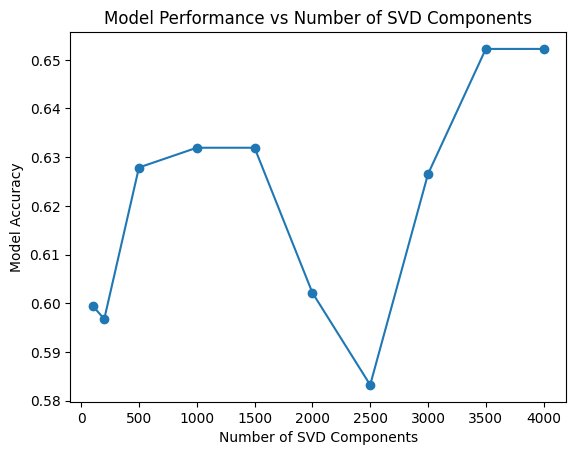

In [57]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  # Example model import; replace with your choice of model

# Experimenting with different numbers of components
n_components_list = [100, 200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
performance = []

for n_components in n_components_list:
    svd = TruncatedSVD(n_components=n_components)
    X_train_svd = svd.fit_transform(X_train_tfidf)
    X_val_svd = svd.transform(X_val_tfidf)

    # Initialize and train your model here
    model = SVC()  # Example model initialization; replace with your choice of model
    model.fit(X_train_svd, y_train)

    # Evaluate the model
    y_pred = model.predict(X_val_svd)
    performance.append(accuracy_score(y_val, y_pred))

# Plotting the performance
plt.plot(n_components_list, performance, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Model Accuracy')
plt.title('Model Performance vs Number of SVD Components')
plt.show()

***Analyzing the Plot:***
**Optimal Point**: Given the plot, 500 components seem to be the optimal number since it's where the model achieves the highest accuracy before the drop. This would be a good starting point for selecting the number of components for Truncated SVD in your final model.

**Further Investigation**: The rise in accuracy at 3000 components is intriguing. It could be worth investigating further if computation time and resources allow. This could involve looking at the specific features that are contributing to the increase in accuracy and ensuring they are not overfitting to the validation set.

## Part 6 Model Preparation and Training

Model training is a critical phase in machine learning and deep learning where a model learns from data to make predictions or perform specific tasks. It involves teaching the model to recognize patterns, relationships, and information within the training dataset.

In this section, we train traditional models (MultinomialNB, SVM) on the training set. Then for the LSTM deep model, we will build a class for it.

For the traditional class, we create a class called "TextClassifier" that can handle different machine learning models (like Multinomial Naive Bayes and SVM) and includes methods for data preparation, training, cross-validation, and prediction. This class will be versatile enough for hyperparameter tuning and can be easily extended for additional models or methods.

In [150]:
from sklearn.model_selection import cross_val_score


class TextClassifier:
    def __init__(self, model):
        self.model = model

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return classification_report(y_test, y_pred, output_dict=True)

    def cross_validate(self, X, y, scoring_metrics=['accuracy'], cv=5):
        results = {}
        for metric in scoring_metrics:
            cv_scores = cross_val_score(self.model, X, y, scoring=metric, cv=cv)
            results[metric] = {'scores': cv_scores, 'average': cv_scores.mean()}
        return results


***Multinomial Naive Bayes Training***
Feature Set for Naive Bayes: Multinomial Naive Bayes typically works well with counts or TF-IDF features. However, it doesn't work directly with negative values, which might sometimes result from dimensionality reduction techniques like SVD. Therefore, it's more common to use the original TF-IDF features (prior to applying SVD) for Naive Bayes.

**Model Training**
- Initialize and train the Multinomial Naive Bayes on the TF-IDF features.

In [151]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Multinomial Naive Bayes model
nb_classifier = TextClassifier(MultinomialNB())
nb_classifier.train(X_train_tfidf, y_train)


***SVM Using TF-IDF Features***

In this approach, each document or text sample is represented as a vector using TF-IDF values. TF-IDF quantifies the importance of each word in a document relative to a collection of documents (corpus).
The SVM algorithm is trained on these TF-IDF vectors, aiming to find the hyperplane that best separates the classes in the high-dimensional TF-IDF feature space.

In [152]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_classifier = TextClassifier(SVC(kernel='linear'))
svm_classifier.train(X_train_tfidf, y_train)

***SVM Using TruncatedSVD Features***

In this approach, TruncatedSVD is applied to reduce the dimensionality of the TF-IDF feature space. TruncatedSVD extracts a lower-dimensional representation of the data while preserving as much relevant information as possible.SVM is trained on the reduced-dimensional features obtained from TruncatedSVD. The goal remains the same: to find a decision boundary that separates the classes effectively.

Benefits of Dimensionality Reduction: TruncatedSVD reduces the dimensionality of the TF-IDF features, making the SVM model potentially faster to train and more robust to noise in high-dimensional data.

In [153]:
# Choose the number of components based on your previous experiments
n_components = 1000  # Example
svd = TruncatedSVD(n_components=n_components)

# Transform the data
X_train_svd = svd.fit_transform(X_train_tfidf)
X_val_svd = svd.transform(X_val_tfidf)

# Initialize and train the SVM model
truncated_svm_classifier = TextClassifier(SVC(kernel='linear'))
truncated_svm_classifier.train(X_train_svd, y_train)

***Deep Learning (LSTM-based neural network)***

LSTM networks are a type of recurrent neural network (RNN) that can capture long-term dependencies and are commonly used in NLP for tasks involving sequences, such as sentiment analysis.They are particularly good at handling sequences of varying lengths and can be used with word embeddings to capture semantic information.

**Word Embeddings**: For neural networks, consider using pre-trained word embeddings as input features if you are not using Truncated SVD.
**Architecture Design**: Design the layers of your neural network and determine the activation functions.If you have a multi-class classification problem, you need to adjust the final Dense layer to have as many units as there are classes, and use 'softmax' as the activation function.
**Normalization and Regularization**: Implement batch normalization and dropout if necessary to prevent overfitting.

In this part, we will define LSTMClassifier class with the function related.

In [171]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.regularizers import l1_l2
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np


class LSTMTextClassifier:

    def __init__(self, max_sequence_length=256, lstm_units=64, learning_rate=0.001, embedding_dim=100,
                 use_dropout=False, dropout_rate=0.5, use_regularization=False, l1_reg=0.01, l2_reg=0.01,
                 batch_size=32, epochs=3):
        self.max_sequence_length = max_sequence_length
        self.lstm_units = lstm_units
        self.learning_rate = learning_rate
        self.embedding_dim = embedding_dim
        self.use_dropout = use_dropout
        self.dropout_rate = dropout_rate
        self.use_regularization = use_regularization
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg
        self.batch_size = batch_size
        self.epochs = epochs
        self.tokenizer = None
        self.model = None

    def _prepare_data(self, texts, labels):
        # Check if tokenizer is already fitted
        if not self.tokenizer:
            self.tokenizer = Tokenizer()
            self.tokenizer.fit_on_texts(texts)  # Fit only if tokenizer is not already fitted
        sequences = self.tokenizer.texts_to_sequences(texts)
        padded_sequences = pad_sequences(sequences, maxlen=self.max_sequence_length)

        self.label_encoder = LabelEncoder()
        encoded_labels = self.label_encoder.fit_transform(labels)
        categorical_labels = to_categorical(np.asarray(encoded_labels))

        return padded_sequences, categorical_labels

    def build_model(self, num_classes):
        vocab_size = len(self.tokenizer.word_index) + 1
        self.model = Sequential()
        self.model.add(
            Embedding(input_dim=vocab_size, output_dim=self.embedding_dim, input_length=self.max_sequence_length))

        if self.use_regularization:
            reg = l1_l2(l1=self.l1_reg, l2=self.l2_reg)
        else:
            reg = None

        self.model.add(LSTM(units=self.lstm_units, return_sequences=False, kernel_regularizer=reg))

        if self.use_dropout:
            self.model.add(Dropout(self.dropout_rate))

        self.model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=reg))
        self.model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=self.learning_rate), metrics=['accuracy'])

    def train(self, train_texts, train_labels, val_texts, val_labels):
        X_train, y_train = self._prepare_data(train_texts, train_labels)
        X_val, y_val = self._prepare_data(val_texts, val_labels)

        num_classes = y_train.shape[1]
        self.build_model(num_classes)
        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=self.batch_size,
                                 epochs=self.epochs)
        return history  # Return the history object

    def evaluate(self, test_texts, test_labels):
        X_test, y_test = self._prepare_data(test_texts, test_labels)
        y_pred = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        # Use the class's label_encoder for target names
        return classification_report(y_true_classes, y_pred_classes, target_names=self.label_encoder.classes_)

    def evaluate_dict(self, test_texts, test_labels):
        X_test, y_test = self._prepare_data(test_texts, test_labels)
        y_pred = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        # Use the class's label_encoder for target names
        return classification_report(y_true_classes, y_pred_classes, target_names=self.label_encoder.classes_,
                                     output_dict=True)

    def predict(self, texts):
        # Ensure the input is in list format
        if not isinstance(texts, list):
            texts = [texts]

        # Tokenize and pad the input texts
        sequences = self.tokenizer.texts_to_sequences(texts)
        padded_sequences = pad_sequences(sequences, maxlen=self.max_sequence_length)

        # Make predictions
        predictions = self.model.predict(padded_sequences)

        # Convert predictions to class labels
        predicted_classes = np.argmax(predictions, axis=1)
        predicted_labels = self.label_encoder.inverse_transform(predicted_classes)

        return predicted_labels

    def save_model(self, file_path):
        if self.model:
            self.model.save(file_path)
        else:
            print("Model not trained yet.")

## Part 7 Model Evaluation

Model evaluation is the process of assessing the performance and effectiveness of a machine learning or statistical model to determine how well it generalizes to new, unseen data. The goal of model evaluation is to understand how accurate, reliable, and suitable a model is for the specific task it was designed for. Model evaluation is a crucial step in the machine learning lifecycle and helps in making informed decisions about model deployment or further improvement.

After training, we will want to evaluate how well the model performs. This involves:

- Using the model.evaluate() method to get the loss value & metrics values for the model in test mode.
- Reviewing the accuracy and other metrics such as precision, recall, and F1 score on the validation set.
- Conducting error analysis to understand where the model is making mistakes.

In [156]:
from sklearn.metrics import classification_report


def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)

    return {
        'train': report_train,
        'test': report_test
    }


# Example usage
nb_evaluation = nb_classifier.evaluate(X_test_tfidf, y_test)
print("Naive Bayes Evaluation:", nb_evaluation)

svm_tfidf_evaluation = svm_classifier.evaluate(X_test_tfidf, y_test)
print("SVM with TF-IDF Evaluation:", svm_tfidf_evaluation)

X_test_svd = svd.transform(X_test_tfidf)
svm_svd_evaluation = truncated_svm_classifier.evaluate(X_test_svd, y_test)
print("SVM with Truncated SVD Evaluation:", svm_svd_evaluation)


Naive Bayes Evaluation: {'negative': {'precision': 0.5282392026578073, 'recall': 0.6824034334763949, 'f1-score': 0.5955056179775281, 'support': 233.0}, 'neutral': {'precision': 0.5879518072289157, 'recall': 0.8106312292358804, 'f1-score': 0.6815642458100559, 'support': 301.0}, 'positive': {'precision': 0.7391304347826086, 'recall': 0.08292682926829269, 'f1-score': 0.14912280701754388, 'support': 205.0}, 'accuracy': 0.5683355886332883, 'macro avg': {'precision': 0.6184404815564439, 'recall': 0.525320497326856, 'f1-score': 0.47539755693504265, 'support': 739.0}, 'weighted avg': {'precision': 0.6110622020644215, 'recall': 0.5683355886332883, 'f1-score': 0.5067304768825269, 'support': 739.0}}
SVM with TF-IDF Evaluation: {'negative': {'precision': 0.562962962962963, 'recall': 0.6523605150214592, 'f1-score': 0.6043737574552683, 'support': 233.0}, 'neutral': {'precision': 0.6571428571428571, 'recall': 0.7641196013289037, 'f1-score': 0.706605222734255, 'support': 301.0}, 'positive': {'precisio

In [161]:
from scipy.sparse import vstack
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with 'stemmed_token' and 'sentiment' columns
# Convert list of tokens to strings
df['text_joined'] = df['stemmed_token'].apply(lambda x: ' '.join(x))

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text_joined'])

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Combine training and validation sets for cross-validation
X_train_val = vstack([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])

# Perform Truncated SVD
svd = TruncatedSVD(n_components=1000)
X_train_val_svd = svd.fit_transform(X_train_val)

# Replace 'f1_score' with 'f1'
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Update classifiers for cross-validation
# Ensure your classifiers are defined (e.g., nb_classifier, svm_classifier, truncated_svm_classifier)

# Cross-Validation for Multinomial Naive Bayes
nb_cv_results = nb_classifier.cross_validate(X_train_val, y_train_val, scoring_metrics=scoring_metrics)
print("Multinomial Naive Bayes Cross-Validation Results:", nb_cv_results)

# Cross-Validation for SVM
svm_cv_results = svm_classifier.cross_validate(X_train_val, y_train_val, scoring_metrics=scoring_metrics)
print("SVM Cross-Validation Results:", svm_cv_results)

# Cross-Validation for Truncated SVM
truncated_svm_cv_results = truncated_svm_classifier.cross_validate(X_train_val_svd, y_train_val,
                                                                   scoring_metrics=scoring_metrics)
print("Truncated SVM Cross-Validation Results:", truncated_svm_cv_results)

Multinomial Naive Bayes Cross-Validation Results: {'accuracy': {'scores': array([0.61336516, 0.62962963, 0.61529271, 0.63082437, 0.60573477]), 'average': 0.6189693273225492}, 'precision_macro': {'scores': array([0.59955427, 0.67423471, 0.64360172, 0.66865134, 0.63545703]), 'average': 0.644299814272532}, 'recall_macro': {'scores': array([0.53717128, 0.54966694, 0.53663266, 0.55672309, 0.53699599]), 'average': 0.5434379919988531}, 'f1_macro': {'scores': array([0.49432957, 0.51129176, 0.50244421, 0.52367512, 0.50641218]), 'average': 0.5076305690131154}}
SVM Cross-Validation Results: {'accuracy': {'scores': array([0.650358  , 0.63918757, 0.61529271, 0.6702509 , 0.64994026]), 'average': 0.6450058881731835}, 'precision_macro': {'scores': array([0.62764599, 0.6200712 , 0.59784412, 0.66392781, 0.63730269]), 'average': 0.6293583630950426}, 'recall_macro': {'scores': array([0.60060235, 0.58770011, 0.56500173, 0.62642508, 0.61109986]), 'average': 0.598165823933851}, 'f1_macro': {'scores': array([

***Multinomial Naive Bayes Cross-Validation Results***
**Accuracy:**
The average accuracy is about 61.90%.
This means that, on average, the model correctly predicts the sentiment about 61.90% of the time across different subsets of your data.
**Precision (Macro):**
The average precision is about 64.43%.
Precision measures the proportion of correctly predicted positive observations. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally).
**Recall (Macro):**
The average recall is about 54.34%.
Recall (also known as sensitivity) measures the proportion of actual positives that were correctly identified.
**F1 Score (Macro):**
The average F1 score is about 50.76%.
The F1 score is a weighted average of precision and recall. This score takes both false positives and false negatives into account, making it a balanced metric.


***SVM Cross-Validation Results***
**Accuracy:**
The average accuracy is about 64.50%.
This model is slightly more accurate than the Multinomial Naive Bayes model in predicting sentiment.
**Precision (Macro):**
The average precision is about 62.94%.
**Recall (Macro):**
The average recall is about 59.82%.
**F1 Score (Macro):**
The average F1 score is about 60.10%.
This model has a better balance between precision and recall compared to the Multinomial Naive Bayes model.


***Truncated SVM Cross-Validation Results***
**Accuracy:**
The average accuracy is about 63.66%.
**Precision (Macro):**
The average precision is about 62.71%.
**Recall (Macro):**
The average recall is about 58.32%.
**F1 Score (Macro):**
The average F1 score is about 58.34%.
This model shows a performance quite similar to the regular SVM model but with a slight decrease in recall and F1 score.

***Overall Interpretation***
- All three models show moderate performance, with accuracies ranging from about 61.90% to 64.50%.
- The SVM model seems to be the best performing one among the three, with the highest average scores in accuracy, precision, recall, and F1 score.
- The precision is generally higher than recall in these models, indicating that they are more conservative in predicting positive classes (i.e., they have a higher threshold for classifying an observation as positive).
- The F1 scores being lower than the accuracy suggests that there is a significant imbalance between precision and recall, which is a common scenario in classification tasks where classes are imbalanced.
- Since these metrics are averages over multiple cross-validation folds, they indicate a generalizable performance rather than performance on a specific subset of data.

In [76]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# Fit the tokenizer on the entire dataset
lstm_tokenizer = Tokenizer()
lstm_tokenizer.fit_on_texts(df['cleaned_text'])

# Initialize the classifier
classifier = LSTMTextClassifier(max_sequence_length=256, lstm_units=64, embedding_dim=100, batch_size=32, epochs=32)
classifier.tokenizer = lstm_tokenizer  # Set the pre-fitted tokenizer

# Split your dataset into training, validation, and test sets
lstm_train_texts, lstm_test_texts, lstm_train_labels, lstm_test_labels = train_test_split(df['cleaned_text'],
                                                                                          df['sentiment'],
                                                                                          test_size=0.2,
                                                                                          random_state=42)
lstm_train_texts, lstm_val_texts, lstm_train_labels, lstm_val_labels = train_test_split(lstm_train_texts,
                                                                                        lstm_train_labels,
                                                                                        test_size=0.25,
                                                                                        random_state=42)  # 0.25 x 0.8 = 0.2

# Train the model
classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)

# Evaluate the model
report = classifier.evaluate(lstm_test_texts, lstm_test_labels)
print(report)


Vocabulary size set to: 17098
Epoch 1/32
93/93 [==============================] - 16s 137ms/step - loss: 0.9936 - accuracy: 0.5073 - val_loss: 0.9413 - val_accuracy: 0.5503
Epoch 2/32
93/93 [==============================] - 13s 141ms/step - loss: 0.5980 - accuracy: 0.7492 - val_loss: 0.7859 - val_accuracy: 0.6518
Epoch 3/32
93/93 [==============================] - 11s 113ms/step - loss: 0.1967 - accuracy: 0.9384 - val_loss: 0.8797 - val_accuracy: 0.6650
Epoch 4/32
93/93 [==============================] - 14s 151ms/step - loss: 0.0398 - accuracy: 0.9895 - val_loss: 1.0689 - val_accuracy: 0.6365
Epoch 5/32
93/93 [==============================] - 11s 116ms/step - loss: 0.0159 - accuracy: 0.9976 - val_loss: 1.1832 - val_accuracy: 0.6599
Epoch 6/32
93/93 [==============================] - 13s 141ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 1.2092 - val_accuracy: 0.6528
Epoch 7/32
93/93 [==============================] - 11s 115ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss:

***LSTM Model Results***
**By Class:**

**Negative:**
- Precision: 63% (63 out of 100 negative predictions are correct)
- Recall: 66% (66% of actual negative cases are correctly identified)
- F1-Score: 64% (balance between precision and recall for negative sentiment)
- Support: 328 (number of actual occurrences of negative sentiment in the dataset)

**Neutral:**
- Precision: 69%
- Recall: 71%
- F1-Score: 70%
- Support: 401

**Positive:**
- Precision: 57%
- Recall: 50%
- F1-Score: 53%
- Support: 256

***Overall:***
- Accuracy: 64% (percentage of total correct predictions)
- Macro Avg of Precision: 63%
- Macro Avg of Recall: 62%
- Macro Avg of F1-Score: 63%

***Overall Comparison***
<br>

| Model                | Accuracy | Precision (Macro) | Recall (Macro) | F1 Score (Macro) |
|----------------------|----------|--------------------|----------------|------------------|
| Multinomial Naive Bayes | 61.90%   | 64.43%             | 54.34%         | 50.76%           |
| SVM                  | 64.50%   | 62.94%             | 59.82%         | 60.10%           |
| Truncated SVM        | 63.66%   | 62.71%             | 58.32%         | 58.34%           |
| LSTM                 | 64.00%   | 63.00%             | 62.00%         | 63.00%           |


**Accuracy:**
The LSTM model has an accuracy comparable to the SVM and Truncated SVM models. It's slightly more accurate than the Multinomial Naive Bayes model.

**Precision and Recall (By Class):**
The LSTM model has mixed results across different sentiment classes. It performs best in terms of precision and recall for the 'neutral' class and least effectively for the 'positive' class.
Compared to the earlier models, it seems to have a similar or slightly better balance between precision and recall for each class, especially for the 'neutral' class.

**F1-Score (By Class):**
The LSTM model's F1-scores indicate a reasonable balance between precision and recall for each sentiment class, especially for 'neutral'. However, it seems to struggle with the 'positive' class.

**Macro Average Scores:**
The LSTM's macro averages are quite comparable to the SVM models, indicating similar overall performance across all classes.

***Interpretation***

- The LSTM model performs well, particularly in classifying neutral sentiments. However, it seems to have difficulty with the positive class, reflected in its lower precision, recall, and F1-score for this category.
- The performance across different classes suggests that the model might be better at distinguishing neutral sentiments from others, but it may need improvements or more training data to better classify positive sentiments.
- The LSTM's overall performance is competitive with traditional machine learning models like SVM, indicating its potential effectiveness in handling complex language patterns in sentiment analysis.

From result of LSTM model, we can know that:

**Training Accuracy vs. Validation Accuracy**: The model reaches near-perfect accuracy on the training set very quickly (by Epoch 6, it's already at 99.97% accuracy). However, the validation accuracy doesn't improve much beyond 66%. This is a classic sign of overfitting, where the model learns the training data too well, including its noise and fluctuations, but fails to generalize effectively to new, unseen data.

**Increasing Validation Loss**: The validation loss increases with each epoch, further confirming overfitting. As the model becomes more tuned to the training data, it loses its ability to perform well on the validation data.

**Test Set Evaluation**: The precision, recall, and f1-score on the test set give a more realistic picture of the model's performance on unseen data. An accuracy of 64% suggests that the model is better than random guessing, but there's certainly room for improvement.

To address the problem, we perform:

**Dropout**: Adding dropout layers to your model can help by randomly setting a fraction of input units to 0 at each update during training, which helps prevent overfitting.

**Regularization**: Use L1 or L2 regularization in LSTM and Dense layers to penalize complex models.

**Tune Hyperparameters**: Experiment with different values for LSTM units, embedding dimensions, batch size, and learning rates.

***This part will be taken in Part 7 Model Tuning***

## Part 8 Model Tuning

***Multinomial Naive Bayes (MNB) Tuning***
MNB has fewer hyperparameters to tune compared to other models. The main parameter is **alpha**, which is a smoothing parameter.

**Alpha:** Vary this parameter between 0 and 1. Smoothing is applied to avoid the issue of zero probability in the dataset. A grid search over several values of alpha (e.g., 0, 0.1, 0.5, 1) can be useful.


In this case, we will apply GridSerchCV to automate the process and find the bset parameters.

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, verbose=2, n_jobs=-1)

grid_search_nb.fit(X_train_tfidf, y_train)  # Use the TF-IDF transformed data

print("Best Parameters for MNB:", grid_search_nb.best_params_)
best_model_nb = MultinomialNB(**grid_search_nb.best_params_)
best_model_nb.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for MNB: {'alpha': 0.5}


MultinomialNB(alpha=0.5)

***Support Vector Machine (SVM) Tuning***
SVM offers several hyperparameters, but the most influential ones are **C**, **kernel**, and **gamma**.

**C (Regularization parameter)**: Controls the trade-off between achieving a low training error and a low testing error that is, the trade-off between overfitting and underfitting.
**Kernel**: The type of kernel used. Common options include **linear**, **poly**, **rbf**, and **sigmoid**.
**Gamma**: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is 'auto', then 1/n_features will be used.

In [167]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Type of kernel
}

grid_search_svm_idf = GridSearchCV(SVC(), param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search_svm_idf.fit(X_train_tfidf, y_train)

print("Best Parameters for Truncated SVM:", grid_search_svm_idf.best_params_)
best_model_svm_idf = SVC(**grid_search_svm_idf.best_params_)
best_model_svm_idf.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for Truncated SVM: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


SVC(C=1, gamma=1, kernel='linear')

***Truncated SVM with SVD Tuning***
For the Truncated SVM, you would primarily tune the SVM parameters as mentioned above. Additionally, you might consider adjusting the number of components in SVD.

**Number of Components in SVD:** Determines the number of dimensions to which the data is reduced.

In [168]:
from sklearn.svm import SVC

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search_svm.fit(X_train_svd, y_train)  # Use the SVD transformed data

print("Best Parameters for Truncated SVM:", grid_search_svm.best_params_)
best_model_svm_trucanted = SVC(**grid_search_svm.best_params_)
best_model_svm_trucanted.fit(X_train_svd, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for Truncated SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=1, gamma=1)

In [169]:
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Cross-Validation for Multinomial Naive Bayes
tuned_nb_classifier = TextClassifier(best_model_nb)
tuned_nb_cv_results = tuned_nb_classifier.cross_validate(X_train_val, y_train_val, scoring_metrics=scoring_metrics)
print("Tuned Multinomial Naive Bayes Cross-Validation Results:", tuned_nb_cv_results)

# Cross-Validation for SVM
tuned_idf_svm_classifier = TextClassifier(best_model_svm_idf)
tuned_svm_cv_results = tuned_idf_svm_classifier.cross_validate(X_train_val, y_train_val,
                                                               scoring_metrics=scoring_metrics)
print("Tuned SVM Cross-Validation Results:", tuned_svm_cv_results)

# Cross-Validation for Truncated SVM
tuned_truncated_svm_classifier = TextClassifier(best_model_svm_trucanted)
tuned_truncated_svm_cv_results = tuned_truncated_svm_classifier.cross_validate(X_train_val_svd, y_train_val,
                                                                               scoring_metrics=scoring_metrics)
print("Truncated SVM Cross-Validation Results:", tuned_truncated_svm_cv_results)

Tuned Multinomial Naive Bayes Cross-Validation Results: {'accuracy': {'scores': array([0.62887828, 0.6427718 , 0.62843489, 0.65949821, 0.62843489]), 'average': 0.6376036133138296}, 'precision_macro': {'scores': array([0.61122101, 0.63428614, 0.59811088, 0.66137058, 0.64980728]), 'average': 0.6309591784277437}, 'recall_macro': {'scores': array([0.56401706, 0.57387859, 0.56133979, 0.60092388, 0.57649113]), 'average': 0.5753300913585433}, 'f1_macro': {'scores': array([0.54218355, 0.55002118, 0.5428602 , 0.58718134, 0.56926351]), 'average': 0.5583019560939702}}
Tuned SVM Cross-Validation Results: {'accuracy': {'scores': array([0.650358  , 0.63918757, 0.61529271, 0.6702509 , 0.64994026]), 'average': 0.6450058881731835}, 'precision_macro': {'scores': array([0.62764599, 0.6200712 , 0.59784412, 0.66392781, 0.63730269]), 'average': 0.6293583630950426}, 'recall_macro': {'scores': array([0.60060235, 0.58770011, 0.56500173, 0.62642508, 0.61109986]), 'average': 0.598165823933851}, 'f1_macro': {'sco

***Result Interpretation***

**Multinomial Naive Bayes (Alpha = 0.5) Cross-Validation Results**

**Accuracy:**
Average accuracy is approximately 63.76%. This means the model correctly predicts the target class about 63.76% of the time across the different subsets of your data.
**Precision (Macro):**
Average precision is about 63.10%. This metric indicates the model's ability to correctly identify positive instances among the instances it labels as positive.
**Recall (Macro):**
Average recall is about 57.53%. This metric shows how well the model can find all the positive instances.
**F1 Score (Macro):**
Average F1 score is about 55.83%. The F1 score is a balance between precision and recall, useful in scenarios where you seek a balance between these two metrics.


**SVM (C = 1, Gamma = 1, Kernel = Linear) Cross-Validation Results**

**Accuracy:**
Average accuracy is approximately 64.50%. This is a slight improvement compared to the MNB model.
**Precision (Macro):**
Average precision is about 62.94%.
**Recall (Macro):**
Average recall is about 59.82%.
**F1 Score (Macro):**
Average F1 score is about 60.10%. This is better than the MNB model, indicating a better balance between precision and recall.


**Truncated SVM (C = 1, Gamma = 1, Kernel = rbf) Cross-Validation Results**

**Accuracy:**
Average accuracy is approximately 63.71%. This is comparable to the MNB model.
**Precision (Macro):**
Average precision is about 62.78%.
**Recall (Macro):**
Average recall is about 58.20%.
**F1 Score (Macro):**
Average F1 score is about 58.13%. Similar to the regular SVM model but with a slight decrease in recall and F1 score.

***Overall Interpretation***
- The SVM model with a linear kernel slightly outperforms the other models in terms of overall accuracy and F1 score.
- All three models show moderate performance, with accuracies ranging around 63-65%.
- The precision and recall values indicate that while the models are reasonably good at predicting positive instances, there's still room for improvement, especially in terms of recall.
- The F1 scores across all models indicate a moderate balance between precision and recall but could be improved for better model performance.

### LSTM Model Tuning

***Adding Dropout Layer***

Adding a dropout layer to a neural network, including pre-trained models like BERT, is a regularization technique. Regularization methods are used to prevent overfitting, which occurs when a model learns to perform well on the training data but fails to generalize to new, unseen data.

Benefit of add dropout layer:

1. **Preventing Overfitting**: Dropout randomly "drops out" (sets to zero) a fraction of the units (neurons) in the input layer during each training step. This helps prevent the model from relying too much on specific neurons and encourages a more robust representation.

2. **Promoting Generalization**: By preventing co-adaptation of neurons, dropout encourages the model to learn more general features that are useful across different parts of the input space. This can lead to a better generalization to unseen data.

3. **Handling Noisy Data**: If your training data contains noise or outliers, dropout can help the model become less sensitive to individual data points and focus on more general patterns.

4. **Reducing Dependency on Specific Features**: Dropout can help break dependencies on specific features, making the model more adaptive to various inputs and reducing the risk of overfitting to peculiarities in the training data.

**Reference:**
https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9

https://medium.com/@upendravijay2/how-does-dropout-help-to-avoid-overfitting-in-neural-networks-91b90fd86b20#:~:text=A%20good%20value%20for%20dropout,new%20network%20that%20uses%20dropout.

In [79]:
dropout_classifier = LSTMTextClassifier(
    max_sequence_length=256,
    lstm_units=64,
    embedding_dim=100,
    dropout_rate=0.5,
    use_dropout=True,
    batch_size=32,
    epochs=32
)

dropout_classifier.tokenizer = lstm_tokenizer

# Train the model
dropout_classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)

# Evaluate the model
report = dropout_classifier.evaluate(lstm_test_texts, lstm_test_labels)
print(report)

Epoch 1/32
93/93 [==============================] - 13s 104ms/step - loss: 1.0112 - accuracy: 0.4975 - val_loss: 0.9103 - val_accuracy: 0.5746
Epoch 2/32
93/93 [==============================] - 9s 101ms/step - loss: 0.6404 - accuracy: 0.7421 - val_loss: 0.7974 - val_accuracy: 0.6548
Epoch 3/32
93/93 [==============================] - 12s 130ms/step - loss: 0.2443 - accuracy: 0.9228 - val_loss: 0.8732 - val_accuracy: 0.6660
Epoch 4/32
93/93 [==============================] - 9s 99ms/step - loss: 0.0959 - accuracy: 0.9807 - val_loss: 1.0336 - val_accuracy: 0.6051
Epoch 5/32
93/93 [==============================] - 11s 114ms/step - loss: 0.1701 - accuracy: 0.9496 - val_loss: 0.9930 - val_accuracy: 0.6386
Epoch 6/32
93/93 [==============================] - 9s 98ms/step - loss: 0.0255 - accuracy: 0.9983 - val_loss: 1.0932 - val_accuracy: 0.6386
Epoch 7/32
93/93 [==============================] - 10s 107ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.2365 - val_accuracy: 0.6355
Epoc

After adding dropout layer, the result does not have significant difference with the classifier without dropout layer. As training progresses, both the loss and accuracy improve. This is expected because the model adjusts its parameters to minimize the loss and improve its predictions.

The epoch with the highest validation accuracy is often considered the best choice, as it indicates the point at which the model performs best on the validation dataset, in our case, we can observe that the highest validation accuracy occurs at the 7th epoch (val_accuracy: 0.6660). However, if consider validation loss and accuracy, the best epoch will be 3rd epoch, as it provide the lowest validation loss (0.8732) and a high accuracy (0.9228). The over high accuracy in later epoch suggest that the model has memorized the training data but may not generalize well to new data.

Also, at starting from epoch 4, the accuracy is increase but the validation accuracy drop, which may indicate the model is overfitting from epoch 4. The validation loss initially decreases but starts increasing from Epoch 3 onwards, while the training loss consistently decreases. This is a classic sign of overfitting.

The precision, recall, and F1-score for each class on the test set provide a more detailed view of the model's performance. The model performs best on classifying 'neutral' sentiments, followed by 'negative' and 'positive'. This might because the neutral label recors in the mose in the datatset.

Epoch 1/3
93/93 [==============================] - 22s 203ms/step - loss: 1.0268 - accuracy: 0.4680 - val_loss: 0.9390 - val_accuracy: 0.5665
Epoch 2/3
93/93 [==============================] - 15s 163ms/step - loss: 0.6595 - accuracy: 0.7266 - val_loss: 0.7902 - val_accuracy: 0.6518
Epoch 3/3
93/93 [==============================] - 18s 199ms/step - loss: 0.2418 - accuracy: 0.9286 - val_loss: 0.8942 - val_accuracy: 0.6569
Epoch 1/3
93/93 [==============================] - 20s 195ms/step - loss: 1.0265 - accuracy: 0.4863 - val_loss: 0.9103 - val_accuracy: 0.5746
Epoch 2/3
93/93 [==============================] - 17s 182ms/step - loss: 0.6795 - accuracy: 0.7103 - val_loss: 0.8078 - val_accuracy: 0.6518
Epoch 3/3
93/93 [==============================] - 16s 168ms/step - loss: 0.3437 - accuracy: 0.8968 - val_loss: 0.8162 - val_accuracy: 0.6792
Epoch 1/3
93/93 [==============================] - 23s 219ms/step - loss: 1.0442 - accuracy: 0.4745 - val_loss: 0.9411 - val_accuracy: 0.5584
Epoch 

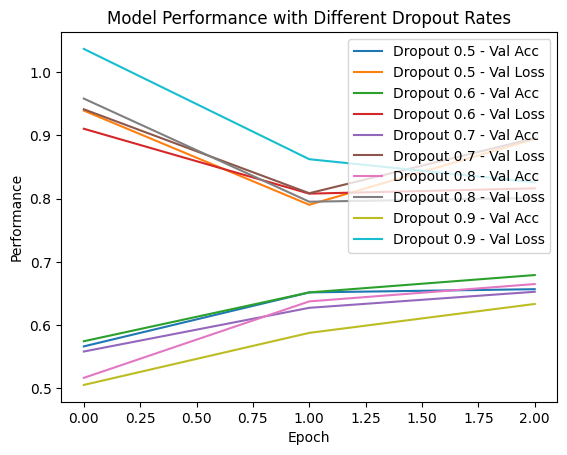

In [92]:
import matplotlib.pyplot as plt

dropout_rates = [0.5, 0.6, 0.7, 0.8, 0.9]
histories = []

for rate in dropout_rates:
    classifier = LSTMTextClassifier(max_sequence_length=256, lstm_units=64, embedding_dim=100,
                                    use_dropout=True, dropout_rate=rate,
                                    batch_size=32, epochs=3)
    classifier.tokenizer = lstm_tokenizer  # Assuming lstm_tokenizer is already fitted
    history = classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)
    histories.append(history)

# Plotting
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Dropout {dropout_rates[i]} - Val Acc')
    plt.plot(history.history['val_loss'], label=f'Dropout {dropout_rates[i]} - Val Loss')

plt.title('Model Performance with Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()


To determine which result is the best, we should look at both the validation accuracy and loss. Generally, a higher validation accuracy and a lower validation loss indicate better model performance. However, it's also important to watch out for signs of overfitting, where the model performs significantly better on the training data compared to the validation data.

Here are the results for each dropout rate after 3 epochs:

Dropout Rate 0.5:
Epoch 3: Val Accuracy = 65.69%, Val Loss = 0.8942
**Dropout Rate 0.6:**
**Epoch 3: Val Accuracy = 67.92%, Val Loss = 0.8162**
Dropout Rate 0.7:
Epoch 3: Val Accuracy = 65.28%, Val Loss = 0.8955
Dropout Rate 0.8:
Epoch 3: Val Accuracy = 66.50%, Val Loss = 0.8010
Dropout Rate 0.9:
Epoch 3: Val Accuracy = 63.35%, Val Loss = 0.8257

Based on these numbers, the model with a dropout rate of 0.6 seems to have the best balance between validation accuracy and loss. It achieves the highest validation accuracy (67.92%) and a relatively low validation loss (0.8162). This suggests that this model is the most effective at generalizing to unseen data among the ones tested.

***Regularisation***

Regularization is a set of techniques used to prevent overfitting in machine learning models.
L1 and L2 regularization are two common types of regularization techniques:

**L1 Regularization (Lasso):**

**Penalty Term:** Adds the absolute values of the coefficients as a penalty term to the loss function.
**Effect:** Encourages sparsity in the model, meaning it tends to drive some of the feature weights to exactly zero. In the context of neural networks, it can lead to sparse networks where some connections are effectively ignored.
**Use Case:** Useful when you suspect that many features are irrelevant or redundant.

**L2 Regularization (Ridge):**

**Penalty Term:** Adds the squared values of the coefficients as a penalty term to the loss function.
**Effect:** Discourages large weights and helps to distribute the importance more evenly among all features. It is less prone to driving weights to exactly zero compared to L1 regularization.
**Use Case:** Generally applicable as it prevents any single feature from dominating the model.

**Reference:**

https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036

Epoch 1/3
93/93 [==============================] - 22s 190ms/step - loss: 1.9554 - accuracy: 0.4396 - val_loss: 1.2726 - val_accuracy: 0.4569
Epoch 2/3
93/93 [==============================] - 15s 167ms/step - loss: 1.0770 - accuracy: 0.5794 - val_loss: 1.0092 - val_accuracy: 0.5675
Epoch 3/3
93/93 [==============================] - 12s 130ms/step - loss: 0.7942 - accuracy: 0.6839 - val_loss: 0.9806 - val_accuracy: 0.5929
Epoch 1/3
93/93 [==============================] - 22s 205ms/step - loss: 2.0151 - accuracy: 0.4616 - val_loss: 1.3175 - val_accuracy: 0.5036
Epoch 2/3
93/93 [==============================] - 18s 191ms/step - loss: 1.0502 - accuracy: 0.6017 - val_loss: 0.9721 - val_accuracy: 0.5959
Epoch 3/3
93/93 [==============================] - 13s 142ms/step - loss: 0.7686 - accuracy: 0.7015 - val_loss: 1.0107 - val_accuracy: 0.6102
Epoch 1/3
93/93 [==============================] - 16s 138ms/step - loss: 2.1294 - accuracy: 0.4443 - val_loss: 1.3175 - val_accuracy: 0.5036
Epoch 

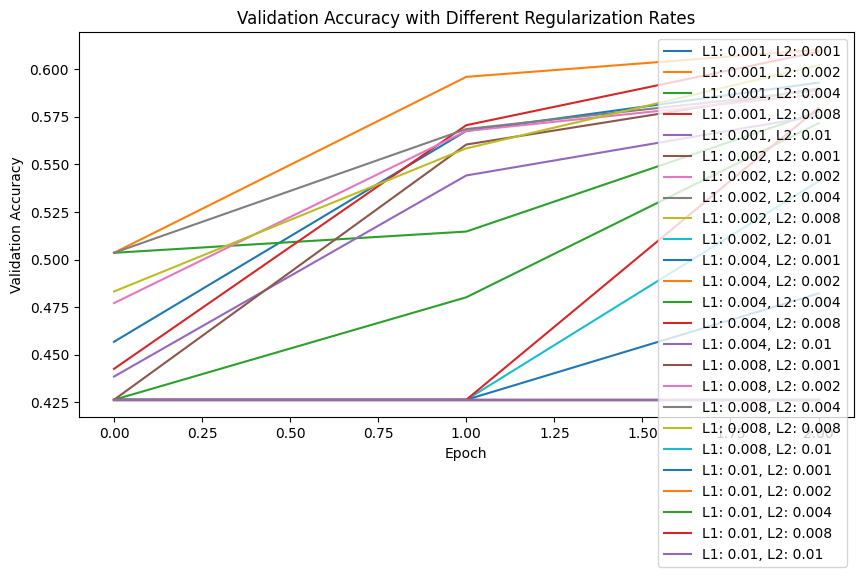

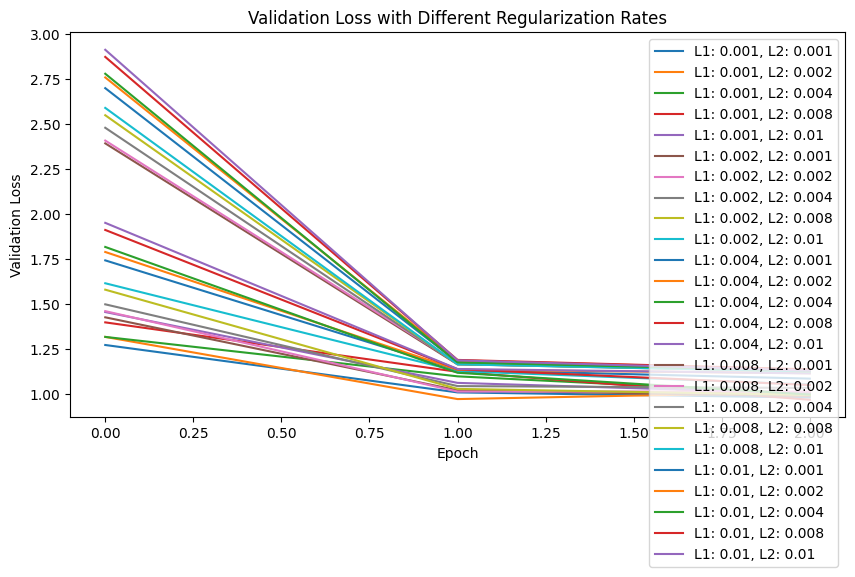

In [93]:
import matplotlib.pyplot as plt

# Define L1 and L2 regularization rates to experiment with
regular_rates = [0.001, 0.002, 0.004, 0.008, 0.01]

# Initialize lists to store results
val_accuracies = []
val_losses = []
rate_labels = []

# Iterate over combinations of L1 and L2 rates
for rate1 in regular_rates:
    for rate2 in regular_rates:
        regular_classifier = LSTMTextClassifier(max_sequence_length=256, lstm_units=64, embedding_dim=100,
                                                use_dropout=True, dropout_rate=0.6, use_regularization=True,
                                                l1_reg=rate1, l2_reg=rate2, batch_size=32, epochs=3)
        regular_classifier.tokenizer = lstm_tokenizer  # Assuming lstm_tokenizer is already fitted

        # Train the model
        history = regular_classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)

        # Store results
        val_accuracies.append(history.history['val_accuracy'])
        val_losses.append(history.history['val_loss'])
        rate_labels.append(f"L1: {rate1}, L2: {rate2}")

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
for i in range(len(val_accuracies)):
    plt.plot(val_accuracies[i], label=rate_labels[i])
plt.title('Validation Accuracy with Different Regularization Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot Validation Loss
plt.figure(figsize=(10, 5))
for i in range(len(val_losses)):
    plt.plot(val_losses[i], label=rate_labels[i])
plt.title('Validation Loss with Different Regularization Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

| L1 Rate | L2 Rate | Val Acc (E1) | Val Acc (E2) | Val Acc (E3) | Val Loss (E1) | Val Loss (E2) | Val Loss (E3) |
|---------|---------|--------------|--------------|--------------|---------------|---------------|---------------|
| 0.001   | 0.001   | 0.4569       | 0.5675       | 0.5929       | 1.2726        | 1.0092        | 0.9806        |
| 0.001   | 0.002   | 0.5036       | 0.5959       | 0.6102       | 1.3175        | 0.9721        | 1.0107        |
| 0.001   | 0.004   | 0.5036       | 0.5777       | 0.5604       | 1.3175        | 1.0984        | 1.0013        |
| 0.001   | 0.008   | 0.4426       | 0.5878       | 0.6335       | 1.3983        | 0.8622        | 0.8257        |
| 0.001   | 0.01    | 0.5036       | 0.5675       | 0.5868       | 1.4557        | 0.8622        | 0.8257        |
| 0.002   | 0.001   | 0.4264       | 0.5411       | 0.5797       | 1.4263        | 1.0621        | 1.0034        |
| 0.002   | 0.002   | 0.4264       | 0.5888       | 0.6020       | 1.4985        | 1.0443        | 1.0338        |
| 0.002   | 0.004   | 0.4264       | 0.5411       | 0.4822       | 1.5799        | 1.0286        | 0.9953        |
| 0.002   | 0.008   | 0.4264       | 0.5797       | 0.4264       | 1.6155        | 1.1275        | 1.0529        |
| 0.002   | 0.01    | 0.4264       | 0.4264       | 0.4264       | 1.7427        | 1.1342        | 1.0857        |
| 0.004   | 0.001   | 0.4264       | 0.4264       | 0.4264       | 1.7893        | 1.1349        | 1.1159        |
| 0.004   | 0.002   | 0.4264       | 0.4264       | 0.4264       | 1.8173        | 1.1182        | 0.9971        |
| 0.004   | 0.004   | 0.4264       | 0.4264       | 0.4264       | 1.9117        | 1.1382        | 1.0504        |
| 0.004   | 0.008   | 0.4264       | 0.4264       | 0.5797       | 1.9512        | 1.1392        | 1.0140        |
| 0.004   | 0.01    | 0.4264       | 0.4264       | 0.4264       | 1.9512        | 1.1392        | 1.1146        |

The rest classifier result all show same result, might describe the underfitting situation.
From overall, higher regularization rates tend to prevent overfitting by penalizing complex models. However, they can also lead to underfitting if the penalty is too strong, which seems to be happening in the cases with the highest regularization rates.

Lower regularization rates may allow more complexity in the model, in our results, the lower regularization rates seem to perform better in terms of validation accuracy compared to the highest rates.

**Best Configuration:** The best configuration would be one where the validation accuracy is highest and the gap between training and validation accuracy is reasonable, indicating good generalization. From results, configurations with moderate regularization rates (such as L1: 0.002, L2: 0.002) might be promising, as they tend to have higher validation accuracies.

***Running Extended Epochs***

For each chosen configuration (L1. 002, L2 .002), run more epochs. This can provide a better understanding of the long-term behavior of the model.

In [96]:
# Example for one of the chosen configurations
chosen_l1_reg = 0.002  # Example value
chosen_l2_reg = 0.002  # Example value
chosen_epochs = 10  # Increased number of epochs

chosen_classifier = LSTMTextClassifier(
    max_sequence_length=256, lstm_units=64, embedding_dim=100,
    use_dropout=True, dropout_rate=0.6, use_regularization=True,
    l1_reg=chosen_l1_reg, l2_reg=chosen_l2_reg,
    batch_size=32, epochs=chosen_epochs
)
chosen_classifier.tokenizer = lstm_tokenizer
chosen_classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)

# Evaluate the model
report = chosen_classifier.evaluate(lstm_test_texts, lstm_test_labels)
print(report)


Epoch 1/10
93/93 [==============================] - 16s 130ms/step - loss: 2.7986 - accuracy: 0.4413 - val_loss: 1.5241 - val_accuracy: 0.4264
Epoch 2/10
93/93 [==============================] - 15s 167ms/step - loss: 1.1303 - accuracy: 0.5259 - val_loss: 1.0146 - val_accuracy: 0.5584
Epoch 3/10
93/93 [==============================] - 15s 163ms/step - loss: 0.8760 - accuracy: 0.6728 - val_loss: 0.9770 - val_accuracy: 0.5939
Epoch 4/10
93/93 [==============================] - 13s 145ms/step - loss: 0.6396 - accuracy: 0.7360 - val_loss: 1.0145 - val_accuracy: 0.5929
Epoch 5/10
93/93 [==============================] - 16s 175ms/step - loss: 0.5348 - accuracy: 0.7817 - val_loss: 1.1410 - val_accuracy: 0.5817
Epoch 6/10
93/93 [==============================] - 13s 135ms/step - loss: 0.4416 - accuracy: 0.8687 - val_loss: 1.2262 - val_accuracy: 0.5574
Epoch 7/10
93/93 [==============================] - 14s 146ms/step - loss: 0.3638 - accuracy: 0.9100 - val_loss: 1.2833 - val_accuracy: 0.5604

C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Analysis before and after regularization in LSTM model***

**Here the model we select before overfitting(val loss < val loss+1):**

| Model | Epoch | Dropout | L1  | L2  | Accuracy | Loss   | Val Accuracy | Val Loss |
|-------|-------|---------|-----|-----|----------|--------|--------------|----------|
| 1     | 3     | -       | -   | -   | 0.9384   | 0.1967 | 0.6650       | 0.8797   |
| 2     | 3     | 0.6     | -   | -   | 0.8968   | 0.3437 | 0.6792       | 0.8162   |
| 3     | 3     | 0.6     | -   | -   | 0.6728   | 0.8760 | 0.5939       | 0.9770   |

**Model 1 before Regularization:**

- This model shows a higher validation accuracy (66.50%) than the model with dropout and regularization but slightly lower than the model with dropout only.

**Model 2 apply Dropout Layer:**

- This model performs better in terms of validation accuracy, reaching 67.92% by the third epoch.
- The validation loss is increasing slightly, suggesting some overfitting, but it's less pronounced than in the third model.

**Model 3 apply Dropout Layer & L1 & L2 regularization :**

- The model starts with a lower accuracy and validation accuracy compared to the other models.
- The accuracy on the validation set is lower (59%) compared to the model with only dropout.


***Interpretation***
- The addition of both dropout and L1 & L2 regularization seems to hinder the model's ability to learn effectively, as seen in the first scenario. It could be that the combined effect of dropout and regularization is too strong, leading to underfitting.
- The model with only dropout (0.6) performs the best in terms of validation accuracy. This suggests that dropout alone is effective in preventing overfitting for this dataset.
- The model without dropout also performs reasonably well, but the addition of dropout seems to offer a slight improvement in preventing overfitting.

***In this case, model with dropout 0.6 at epoch 3 will be chosen to perform hyperparameters tuning***

***Hyperparameters Tuning For LSTM Model***

To further experiment with the performance of your LSTM model, we can adjust the number of LSTM units and the learning rate. These hyperparameters significantly influence the model's capacity to learn from the data.

1. Adjusting the Number of LSTM Units
    - The number of LSTM units in a layer determines the capacity of the model to capture information. A higher number of units can capture more complex patterns but might lead to overfitting.
    - We will try different values like 32, 128, or 256 units and see how they affect the model's performance.

2. Adjusting the Learning Rate
    - The learning rate controls how much the model's weights are updated during training. A smaller learning rate might lead to more precise convergence but can slow down the training process.
    - Common values to try are 0.01, 0.001, and 0.0001.

In [125]:
# Store performance metrics
performance_metrics = []

# Define the range of LSTM units and learning rates to test
lstm_units_options = [32, 64, 128, 256]
learning_rate_options = [0.01, 0.001, 0.0001]

# Iterate over the options and train the model
for lstm_units in lstm_units_options:
    for learning_rate in learning_rate_options:
        print(f"Training with {lstm_units} LSTM units and learning rate {learning_rate}")

        # Initialize the model
        tuned_classifier = LSTMTextClassifier(
            max_sequence_length=256, lstm_units=lstm_units, learning_rate=learning_rate,
            embedding_dim=100, use_dropout=True, dropout_rate=0.6,
            use_regularization=False, batch_size=32, epochs=3
        )
        tuned_classifier.tokenizer = lstm_tokenizer

        # Train the model and store the history
        tuned_history = tuned_classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)

        # Store the performance metrics
        performance_metrics.append({
            "lstm_units": lstm_units,
            "learning_rate": learning_rate,
            "val_accuracy": tuned_history.history['val_accuracy'],
            "val_loss": tuned_history.history['val_loss']
        })

Training with 32 LSTM units and learning rate 0.01
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 10s 75ms/step - loss: 0.9325 - accuracy: 0.5638 - val_loss: 0.8424 - val_accuracy: 0.6051
Epoch 2/3
93/93 [==============================] - 8s 83ms/step - loss: 0.3530 - accuracy: 0.8758 - val_loss: 1.0539 - val_accuracy: 0.6030
Epoch 3/3
93/93 [==============================] - 7s 80ms/step - loss: 0.1096 - accuracy: 0.9699 - val_loss: 1.4076 - val_accuracy: 0.6102
Training with 32 LSTM units and learning rate 0.001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 8s 71ms/step - loss: 1.0527 - accuracy: 0.4545 - val_loss: 0.9936 - val_accuracy: 0.5137
Epoch 2/3
93/93 [==============================] - 6s 66ms/step - loss: 0.7920 - accuracy: 0.6629 - val_loss: 0.7813 - val_accuracy: 0.6457
Epoch 3/3
93/93 [==============================] - 8s 83ms/step - loss: 0.3505 - accuracy: 0.8978 - val_loss: 0.8259 - val_accuracy: 0.6467
Training with 32 LSTM units and learning rate 0.0001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 10s 72ms/step - loss: 1.0944 - accuracy: 0.3963 - val_loss: 1.0923 - val_accuracy: 0.4345
Epoch 2/3
93/93 [==============================] - 6s 70ms/step - loss: 1.0813 - accuracy: 0.4355 - val_loss: 1.0784 - val_accuracy: 0.4294
Epoch 3/3
93/93 [==============================] - 8s 82ms/step - loss: 1.0590 - accuracy: 0.4372 - val_loss: 1.0654 - val_accuracy: 0.4264
Training with 64 LSTM units and learning rate 0.01
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 13s 111ms/step - loss: 0.9440 - accuracy: 0.5574 - val_loss: 0.9069 - val_accuracy: 0.5482
Epoch 2/3
93/93 [==============================] - 11s 115ms/step - loss: 0.3859 - accuracy: 0.8602 - val_loss: 1.0498 - val_accuracy: 0.6122
Epoch 3/3
93/93 [==============================] - 10s 112ms/step - loss: 0.1203 - accuracy: 0.9628 - val_loss: 1.3296 - val_accuracy: 0.6091
Training with 64 LSTM units and learning rate 0.001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 13s 118ms/step - loss: 1.0260 - accuracy: 0.4873 - val_loss: 0.9112 - val_accuracy: 0.5766
Epoch 2/3
93/93 [==============================] - 11s 117ms/step - loss: 0.6387 - accuracy: 0.7316 - val_loss: 0.7933 - val_accuracy: 0.6609
Epoch 3/3
93/93 [==============================] - 10s 106ms/step - loss: 0.2632 - accuracy: 0.9144 - val_loss: 0.8687 - val_accuracy: 0.6579
Training with 64 LSTM units and learning rate 0.0001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 19s 183ms/step - loss: 1.0902 - accuracy: 0.4210 - val_loss: 1.0793 - val_accuracy: 0.4254
Epoch 2/3
93/93 [==============================] - 18s 195ms/step - loss: 1.0565 - accuracy: 0.4430 - val_loss: 1.0589 - val_accuracy: 0.4264
Epoch 3/3
93/93 [==============================] - 13s 143ms/step - loss: 1.0389 - accuracy: 0.4525 - val_loss: 1.0448 - val_accuracy: 0.4497
Training with 128 LSTM units and learning rate 0.01
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 24s 232ms/step - loss: 0.9545 - accuracy: 0.5631 - val_loss: 0.8694 - val_accuracy: 0.6132
Epoch 2/3
93/93 [==============================] - 22s 231ms/step - loss: 0.3720 - accuracy: 0.8768 - val_loss: 1.1366 - val_accuracy: 0.5695
Epoch 3/3
93/93 [==============================] - 22s 238ms/step - loss: 0.1107 - accuracy: 0.9668 - val_loss: 1.4346 - val_accuracy: 0.5817
Training with 128 LSTM units and learning rate 0.001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 24s 232ms/step - loss: 1.0053 - accuracy: 0.5168 - val_loss: 0.8763 - val_accuracy: 0.5807
Epoch 2/3
93/93 [==============================] - 22s 233ms/step - loss: 0.6470 - accuracy: 0.7228 - val_loss: 0.7963 - val_accuracy: 0.6315
Epoch 3/3
93/93 [==============================] - 22s 239ms/step - loss: 0.2510 - accuracy: 0.9212 - val_loss: 0.8978 - val_accuracy: 0.6579
Training with 128 LSTM units and learning rate 0.0001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 23s 235ms/step - loss: 1.0819 - accuracy: 0.4223 - val_loss: 1.0646 - val_accuracy: 0.4264
Epoch 2/3
93/93 [==============================] - 22s 234ms/step - loss: 1.0499 - accuracy: 0.4460 - val_loss: 1.0548 - val_accuracy: 0.4518
Epoch 3/3
93/93 [==============================] - 21s 231ms/step - loss: 1.0320 - accuracy: 0.4985 - val_loss: 1.0307 - val_accuracy: 0.4944
Training with 256 LSTM units and learning rate 0.01
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 119s 1s/step - loss: 1.1220 - accuracy: 0.4291 - val_loss: 1.1191 - val_accuracy: 0.4599
Epoch 2/3
93/93 [==============================] - 116s 1s/step - loss: 0.6303 - accuracy: 0.7519 - val_loss: 1.0439 - val_accuracy: 0.5482
Epoch 3/3
93/93 [==============================] - 115s 1s/step - loss: 0.2022 - accuracy: 0.9262 - val_loss: 1.2905 - val_accuracy: 0.5726
Training with 256 LSTM units and learning rate 0.001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 116s 1s/step - loss: 1.0087 - accuracy: 0.5012 - val_loss: 0.9015 - val_accuracy: 0.5716
Epoch 2/3
93/93 [==============================] - 112s 1s/step - loss: 0.6346 - accuracy: 0.7371 - val_loss: 0.8065 - val_accuracy: 0.6457
Epoch 3/3
93/93 [==============================] - 110s 1s/step - loss: 0.2250 - accuracy: 0.9289 - val_loss: 0.8995 - val_accuracy: 0.6457
Training with 256 LSTM units and learning rate 0.0001
Epoch 1/3


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 113s 1s/step - loss: 1.0724 - accuracy: 0.4308 - val_loss: 1.0632 - val_accuracy: 0.4264
Epoch 2/3
93/93 [==============================] - 106s 1s/step - loss: 1.0491 - accuracy: 0.4599 - val_loss: 1.0499 - val_accuracy: 0.4619
Epoch 3/3
93/93 [==============================] - 110s 1s/step - loss: 1.0214 - accuracy: 0.5110 - val_loss: 1.0139 - val_accuracy: 0.5096


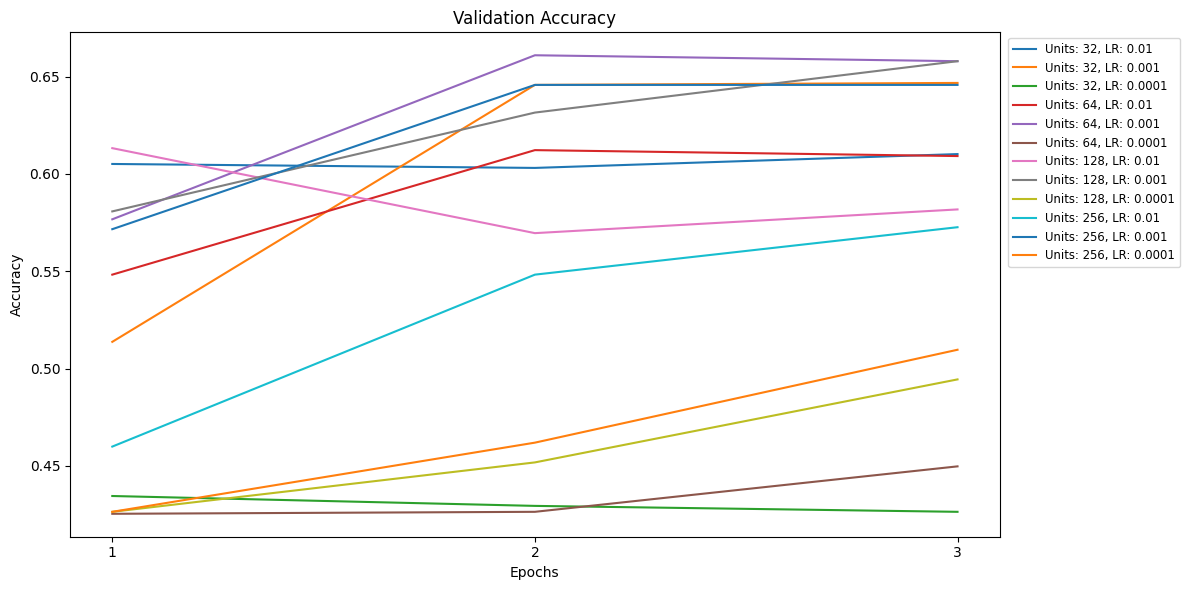

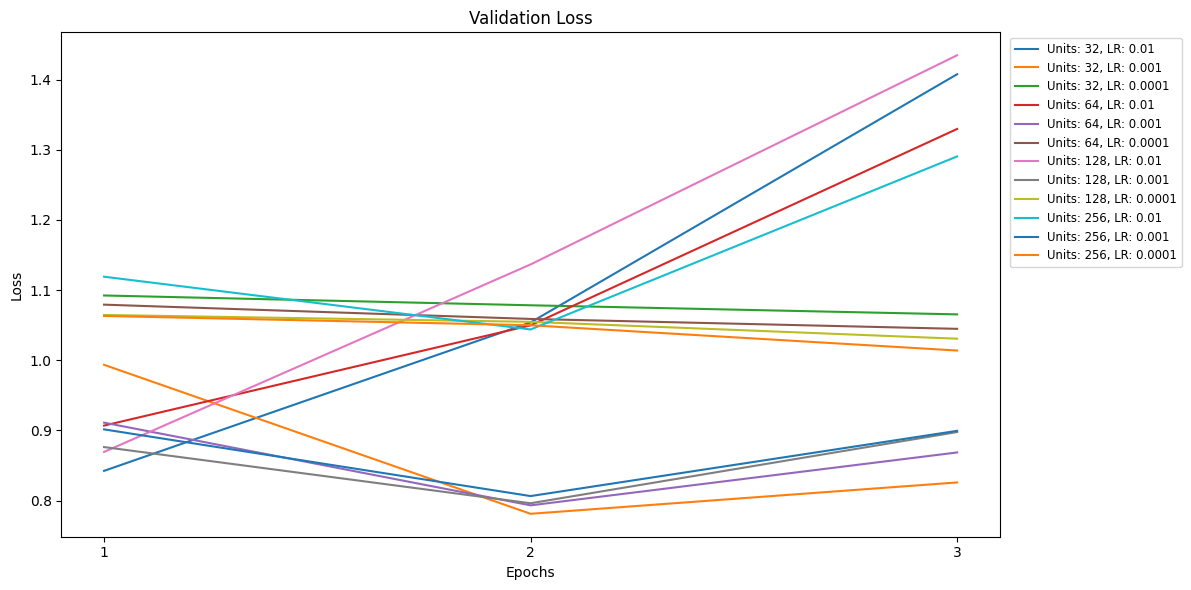

In [139]:
# Plotting the performance for accuracy
plt.figure(figsize=(12, 6))
for metrics in performance_metrics:
    plt.plot(metrics['val_accuracy'], label=f"Units: {metrics['lstm_units']}, LR: {metrics['learning_rate']}")
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', fontsize='small',
           bbox_to_anchor=(1.2, 1))  # Place legend outside on the right and set font size to 'small'
plt.xticks(ticks=[0, 1, 2], labels=[1, 2, 3])  # Set x-axis ticks and labels starting from 1
plt.tight_layout()
plt.show()

# Plotting the performance for loss
plt.figure(figsize=(12, 6))
for metrics in performance_metrics:
    plt.plot(metrics['val_loss'], label=f"Units: {metrics['lstm_units']}, LR: {metrics['learning_rate']}")
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='small',
           bbox_to_anchor=(1.2, 1))  # Place legend outside on the right and set font size to 'small'
plt.xticks(ticks=[0, 1, 2], labels=[1, 2, 3])  # Set x-axis ticks and labels starting from 1
plt.tight_layout()
plt.show()


***Result Interpretation***

**Impact of LSTM Units and Learning Rates:**

**32 LSTM Units:** With 0.001 learning rate, the model achieves a balance between training and validation accuracy without significant overfitting.
**64 LSTM Units:** Similarly, a 0.001 learning rate leads to a good balance with slightly higher validation accuracy.
**128 LSTM Units:** The 0.001 learning rate again appears to be effective, providing a good balance and relatively high validation accuracy.
**256 LSTM Units:** While the model with a 0.001 learning rate performs well, the increase in LSTM units does not seem to significantly enhance performance compared to smaller units.

**Choosing the Best Configuration:**

From the results, a configuration with 64 or 128 LSTM units and a learning rate of 0.001 seems to be effective. This configuration provides a good balance between learning capacity and generalization without significant overfitting.

***Lastly, we will compare the performance between 64 and 128 LSTM model at 0.001 learning rate and dropout layer of 0.6***

In [140]:
# Store performance metrics
performance_metrics = []

# Define the range of LSTM units and learning rates to test
lstm_units_options = [64, 128]

# Iterate over the options and train the model
for lstm_units in lstm_units_options:
    print(f"Training with {lstm_units} LSTM units")

    # Initialize the model
    tuned_classifier = LSTMTextClassifier(
        max_sequence_length=256, lstm_units=lstm_units, learning_rate=0.001,
        embedding_dim=100, use_dropout=True, dropout_rate=0.6,
        use_regularization=False, batch_size=32, epochs=10
    )
    tuned_classifier.tokenizer = lstm_tokenizer

    # Train the model and store the history
    tuned_history = tuned_classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)

    # Store the performance metrics
    performance_metrics.append({
        "lstm_units": lstm_units,
        "val_accuracy": tuned_history.history['val_accuracy'],
        "val_loss": tuned_history.history['val_loss']
    })

Training with 64 LSTM units
Epoch 1/10


C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 23s 216ms/step - loss: 1.0282 - accuracy: 0.4907 - val_loss: 0.9241 - val_accuracy: 0.5777
Epoch 2/10
93/93 [==============================] - 17s 186ms/step - loss: 0.6913 - accuracy: 0.7036 - val_loss: 0.8125 - val_accuracy: 0.6528
Epoch 3/10
93/93 [==============================] - 18s 189ms/step - loss: 0.2940 - accuracy: 0.9022 - val_loss: 0.8688 - val_accuracy: 0.6447
Epoch 4/10
93/93 [==============================] - 14s 152ms/step - loss: 0.0862 - accuracy: 0.9810 - val_loss: 1.0285 - val_accuracy: 0.6650
Epoch 5/10
93/93 [==============================] - 12s 126ms/step - loss: 0.0225 - accuracy: 0.9980 - val_loss: 1.1860 - val_accuracy: 0.6690
Epoch 6/10
93/93 [==============================] - 18s 193ms/step - loss: 0.0085 - accuracy: 0.9993 - val_loss: 1.2884 - val_accuracy: 0.6426
Epoch 7/10
93/93 [==============================] - 12s 126ms/step - loss: 0.0066 - accuracy: 0.9993 - val_loss: 1.4096 - val_accuracy: 0.6579
Epoch 8/10

C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


93/93 [==============================] - 25s 249ms/step - loss: 1.0111 - accuracy: 0.5042 - val_loss: 0.8879 - val_accuracy: 0.5665
Epoch 2/10
93/93 [==============================] - 22s 240ms/step - loss: 0.6319 - accuracy: 0.7299 - val_loss: 0.8375 - val_accuracy: 0.6213
Epoch 3/10
93/93 [==============================] - 23s 246ms/step - loss: 0.2521 - accuracy: 0.9218 - val_loss: 0.8589 - val_accuracy: 0.6497
Epoch 4/10
93/93 [==============================] - 23s 243ms/step - loss: 0.0602 - accuracy: 0.9854 - val_loss: 1.0305 - val_accuracy: 0.6487
Epoch 5/10
93/93 [==============================] - 23s 247ms/step - loss: 0.0228 - accuracy: 0.9959 - val_loss: 1.2502 - val_accuracy: 0.6528
Epoch 6/10
93/93 [==============================] - 22s 240ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 1.3635 - val_accuracy: 0.6619
Epoch 7/10
93/93 [==============================] - 23s 246ms/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 1.4420 - val_accuracy: 0.6538
Epoch 8/10

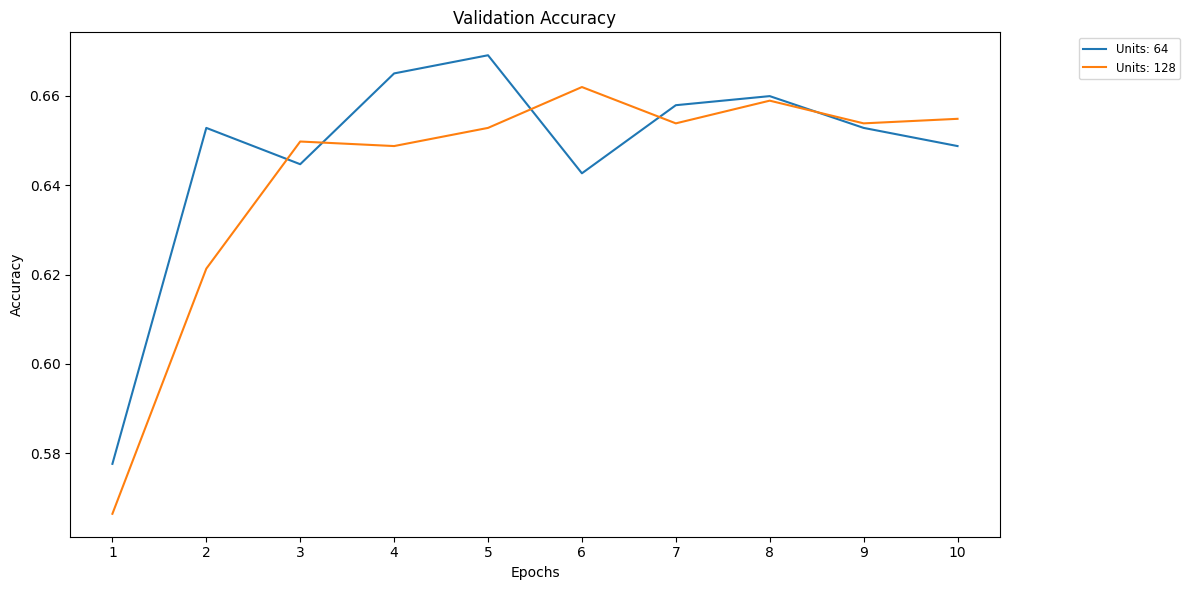

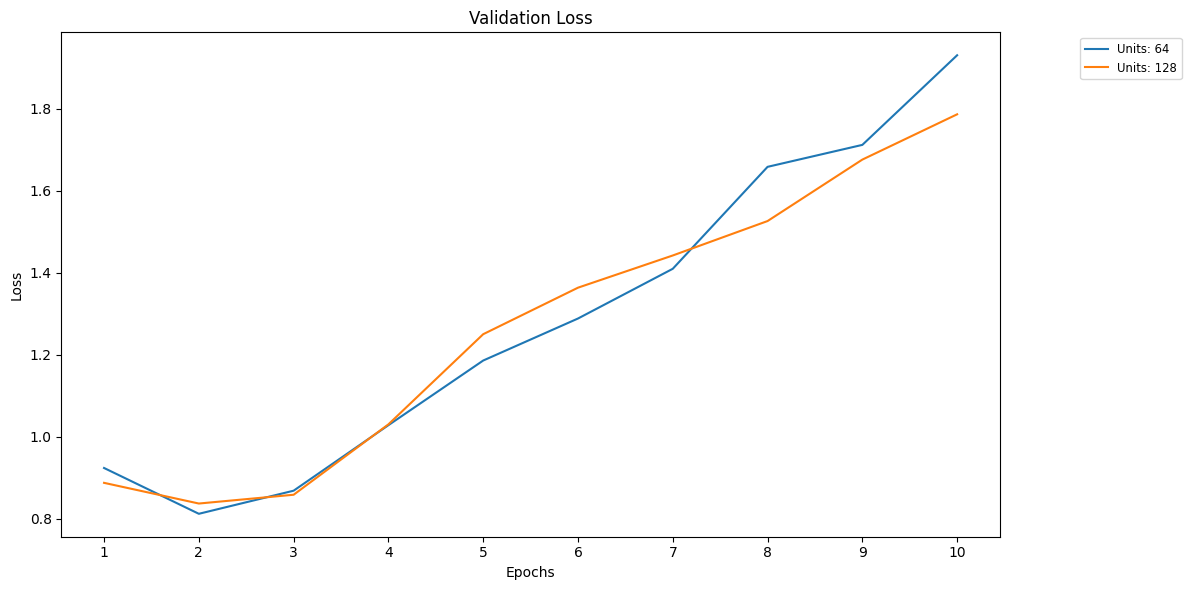

In [142]:
# Plotting the performance for accuracy
plt.figure(figsize=(12, 6))
for metrics in performance_metrics:
    plt.plot(metrics['val_accuracy'], label=f"Units: {metrics['lstm_units']}")
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', fontsize='small',
           bbox_to_anchor=(1.2, 1))  # Place legend outside on the right and set font size to 'small'
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Set x-axis ticks and labels starting from 1
plt.tight_layout()
plt.show()

# Plotting the performance for loss
plt.figure(figsize=(12, 6))
for metrics in performance_metrics:
    plt.plot(metrics['val_loss'], label=f"Units: {metrics['lstm_units']}")
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='small',
           bbox_to_anchor=(1.2, 1))  # Place legend outside on the right and set font size to 'small'
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Set x-axis ticks and labels starting from 1
plt.tight_layout()
plt.show()


Based on the results provided for the two models (64 LSTM units and 128 LSTM units), let's analyze and compare their performance to determine the best choice:

**Model with 64 LSTM Units**

**Validation Accuracy**: Starts at 57.77% in the first epoch and peaks at 66.50% in the fourth epoch before gradually decreasing.
**Validation Loss**: Gradually increases from 0.9241 in the first epoch to 1.9299 in the tenth epoch.
Observation: This model shows signs of overfitting as the epochs progress, indicated by increasing validation loss despite high training accuracy.

**Model with 128 LSTM Units**

**Validation Accuracy**: Begins at 56.65% and peaks at 64.97% in the third epoch, then fluctuates slightly before ending at 65.48%.
**Validation Loss**: Rises steadily from 0.8879 in the first epoch to 1.7860 in the tenth epoch.
Observation: Similar to the first model, this one also exhibits signs of overfitting, as seen from the increasing validation loss.

***Conclusion***

**Best Model:** The model with **128 LSTM units** appears to be slightly better, as it maintains a higher validation accuracy in the later epochs compared to the 64-unit model.
**Optimal Epoch:** The optimal epoch for the 128-unit model seems to be around the **3rd epoch**, where it reaches its peak validation accuracy of 64.97% without a significant increase in validation loss

In [143]:
final_classifier = LSTMTextClassifier(
    max_sequence_length=256, lstm_units=128, learning_rate=0.001,
    embedding_dim=100, use_dropout=True, dropout_rate=0.6,
    use_regularization=False, batch_size=32, epochs=3
)
final_classifier.tokenizer = lstm_tokenizer

final_classifier.train(lstm_train_texts, lstm_train_labels, lstm_val_texts, lstm_val_labels)

lstm_final_result = final_classifier.evaluate(lstm_test_texts, lstm_test_labels)

print(lstm_final_result)

C:\Users\wr431\anaconda3\envs\nlp_assm\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
93/93 [==============================] - 27s 259ms/step - loss: 1.0146 - accuracy: 0.4981 - val_loss: 0.9226 - val_accuracy: 0.5553
Epoch 2/3
93/93 [==============================] - 23s 244ms/step - loss: 0.6583 - accuracy: 0.7174 - val_loss: 0.8097 - val_accuracy: 0.6508
Epoch 3/3
31/31 [==============================] - 2s 61ms/step
              precision    recall  f1-score   support

    negative       0.70      0.58      0.63       328
     neutral       0.71      0.73      0.72       401
    positive       0.53      0.63      0.58       256

    accuracy                           0.65       985
   macro avg       0.65      0.64      0.64       985
weighted avg       0.66      0.65      0.65       985



***Result Discussion***

**Accuracy**: The accuracy is 65%. This means that 65% of the predictions made by your model are correct. It's a good overall measure of the model's performance, but it doesn't give insight into how it performs on each individual class.

**Precision**: Your model's weighted average precision is 66%. Precision measures the proportion of positive identifications that were actually correct. A precision of 66% means that when your model predicts a class, it is correct 66% of the time.

**Recall**: The recall is 65% (weighted average). Recall measures the proportion of actual positives that were identified correctly. A recall of 65% indicates that your model correctly identifies 65% of all actual instances of each class.

**F1-Score**: The F1-score is 65% (weighted average). The F1-score is a balance between precision and recall, providing a single metric that summarizes a model's performance, especially when precision and recall are similarly important. A 65% F1-score indicates a good balance between precision and recall.

**Interpretation:**

- An accuracy of 65% shows that the model is moderately effective but still has room for improvement.
- The precision of 66% suggests that the model is relatively reliable in its predictions, but about a third of the predicted labels might still be incorrect.
- The recall of 65% indicates that the model is able to identify a majority of true instances for each class, but it's missing about 35% of them.
- The F1-score of 65% shows a balanced trade-off between precision and recall, indicating the model's overall effectiveness in classifying the data.
- Overall, these metrics suggest that while the model is performing better than random guessing (which would be 33% for a three-class problem), it may still benefit from further tuning or different approaches to improve its ability to correctly identify and classify instances, especially in addressing false positives and negatives.

***Ovarall Tuned Model Comparison***
<br>

| Model | Accuracy | Precision (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) |
|-------|----------|-----------------------|--------------------|----------------------|
| LSTM (128 units, 3 epochs, LR=0.001, Dropout=0.06) | 65% | 65% | 64% | 64% |
| Multinomial Naive Bayes (Alpha = 0.5) | 63.76% | 63.10% | 57.53% | 55.83% |
| SVM (C = 1, Gamma = 1, Kernel = Linear) | 64.50% | 62.94% | 59.82% | 60.10% |
| Truncated SVM (C = 1, Gamma = 1) | 63.71% | 62.78% | 58.20% | 58.13% |
<br>
**Interpretation**
- The LSTM model outperforms the traditional models slightly in terms of overall accuracy and maintains a good balance across precision, recall, and F1-score.
- The LSTM's performance is particularly notable given that it is a single architecture, whereas traditional models often require careful feature engineering.
- The results indicate that for this specific task, deep learning approaches like LSTM can be competitive with, or even outperform, traditional machine learning models.

## Part 9 Final Model Evaluation

***Overall Result Interpretation***

| Model                | Accuracy | Precision (Macro) | Recall (Macro) | F1 Score (Macro) |
|----------------------|----------|--------------------|----------------|------------------|
| Multinomial Naive Bayes | 61.90%   | 64.43%             | 54.34%         | 50.76%           |
| Multinomial Naive Bayes (Alpha = 0.5) | 63.76% | 63.10% | 57.53% | 55.83% |
| SVM                  | 64.50%   | 62.94%             | 59.82%         | 60.10%           |
| Multinomial Naive Bayes (Alpha = 0.5) | 63.76% | 63.10% | 57.53% | 55.83% |
| Truncated SVM        | 63.66%   | 62.71%             | 58.32%         | 58.34%           |
| Truncated SVM (C = 1, Gamma = 1) | 63.71% | 62.78% | 58.20% | 58.13% |
| LSTM                 | 64.00%   | 63.00%             | 62.00%         | 63.00%           |
| LSTM (128 units, 3 epochs, LR=0.001, Dropout=0.06) | 65% | 65% | 64% | 64% |


**Multinomial Naive Bayes:**

- Post-tuning, there's an improvement in accuracy, recall, and F1 score. This indicates that tuning the alpha parameter helped the model make more balanced and accurate classifications.
- The slight drop in precision might suggest that while the model is now better at correctly identifying positive instances (higher recall), it's slightly more prone to false positives.

**SVM:**

- The performance metrics remain unchanged post-tuning. This could imply that the default parameters were already optimal for the dataset, or that the parameter space explored during tuning didn't include the optimal values.
- Another possibility is that the SVM model is less sensitive to changes in the parameters within the explored range for this specific dataset.

**Truncated SVM:**

- There's a marginal change in the performance metrics post-tuning. This slight variation could be due to the inherent randomness in the training process or minor changes in the parameter values.
- The almost unchanged performance suggests that the truncated SVM might have reached its performance capacity on this dataset with the given features.

**LSTM:**

- The LSTM shows a noticeable improvement in all metrics after tuning. This improvement can be attributed to the model's ability to better capture temporal dependencies in the data, which is particularly beneficial for text data.
- The tuning of parameters like the number of LSTM units, learning rate, and dropout can significantly impact the LSTM's ability to learn from the data without overfitting.

### Best Model Configuration

 Determining the "best" model depends on various factors including the specific requirements of your task, the trade-offs between different performance metrics, and the practical aspects of model deployment and maintenance. Based on the provided data, here are some considerations:

**Accuracy:** If overall accuracy is your primary concern, the LSTM and the SVM models are the top performers with accuracies of 65% and 64.5% respectively. The LSTM has a slight edge in this regard.

**Balance Between Precision and Recall:** The LSTM model shows a good balance between precision and recall with both metrics at 65% and 64%, respectively. If both false positives and false negatives are equally costly for your application, the LSTM might be the preferred choice.

**Complexity and Interpretability:** Traditional models like SVM and MNB are generally easier to interpret and can be quicker to train compared to LSTM. If you need a model that's easier to explain, or if computational resources are limited, lean towards these models will be a good choice.

**Specific Use Case:**
- For a task where false negatives are more critical (e.g., detecting negative sentiments in customer feedback where missing a negative comment is costlier), a model with higher recall is preferred. In this case, the LSTM, with a recall of 64%, might be a better choice.
- For a task where precision is more critical (e.g., content recommendation where irrelevant recommendations are to be minimized), a model with higher precision might be preferred.

### Conclusion
- The **LSTM model** appears to be the best overall, considering its balanced performance in terms of accuracy, precision, and recall.
- However, if interpretability and computational efficiency are more important, the **SVM model** is a strong contender, offering competitive performance with slightly lower complexity.

## Part 10 Model Deployment

Our basic idea is to create a graphical user interface (GUI) where users can input data (e.g., text for sentiment analysis), and the model will process this input and return the prediction. The Tkinter library in Python is a standard tool for creating such interfaces. We will save the train model to use in python file.

In [173]:
# Save the trained model
final_classifier.model.save('final_model/final_sentiment_model.h5')

In [174]:
# Save Tokenizer and Label Encoder
import pickle

# Save the tokenizer
with open('final_model/tokenizer.pkl', 'wb') as file:
    pickle.dump(final_classifier.tokenizer, file)

# Save the label encoder
with open('final_model/label_encoder.pkl', 'wb') as file:
    pickle.dump(final_classifier.label_encoder, file)


Program File: "model_deployment.py"
